In [69]:
#importações das bibliotecas
import pandas as pd
import requests


## Campeonato brasileiro 2024

In [70]:
seriaA2024 = requests.get('https://pt.wikipedia.org/wiki/Campeonato_Brasileiro_de_Futebol_de_2024_-_S%C3%A9rie_A')

# Informações do campeonato de 2024
tabelas2024 = pd.read_html(seriaA2024.text)
tabela_classificação2024 = tabelas2024[6]
tabela_jogos2024 = tabelas2024[7]

C:\Users\Thiago\AppData\Local\Temp\ipykernel_13288\3065207342.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tabelas2024 = pd.read_html(seriaA2024.text)


In [71]:
#criando uma lista com os nomes dos times
nomes_times_2024 = list(tabela_jogos2024["Casa \ Fora"])
#criando uma lista com as siglas dos times
sigla_times_2024 = list(tabela_jogos2024.columns)
sigla_times_2024.pop(0)

#criando um dicionário com a sigla dos times
apelidos_times_2024 = dict(zip(sigla_times_2024, nomes_times_2024))


In [72]:
# Ajustar a tabela de jogos
tabela_jogos2024_ajustada = tabela_jogos2024.set_index("Casa \ Fora")

# Desempilhar a tabela
tabela_jogos2024_ajustada = tabela_jogos2024_ajustada.unstack().reset_index()

# Renomear as colunas
tabela_jogos2024_ajustada = tabela_jogos2024_ajustada.rename(columns={"level_0": "Fora", "Casa \ Fora": "Casa", 0: "Placar"})

# Função para ajustar o nome dos times
def ajustar_apelido(linha, apelido):
    time = linha["Fora"]
    return apelido[time]

# Ajustar o nome dos times aplicando a função
tabela_jogos2024_ajustada["Fora"] = tabela_jogos2024_ajustada.apply(ajustar_apelido, axis=1, args=(apelidos_times_2024,))
# Remover jogos entre o mesmo time
tabela_jogos2024_ajustada = tabela_jogos2024_ajustada[tabela_jogos2024_ajustada["Fora"] != tabela_jogos2024_ajustada["Casa"]]


In [73]:
tabela_jogos2024_ajustada["Placar"] = tabela_jogos2024_ajustada["Placar"].fillna("A jogar")

jogos_realizados = tabela_jogos2024_ajustada[tabela_jogos2024_ajustada["Placar"].str.contains("–")]
jogos_faltantes = tabela_jogos2024_ajustada[~tabela_jogos2024_ajustada["Placar"].str.contains("–")]
jogos_faltantes = jogos_faltantes.drop(columns=["Placar"])

# Separando a coluna Placar em gols_casa e gols_fora
jogos_realizados["gols_casa"] = jogos_realizados["Placar"].str.split("–").str[0].astype(int)
jogos_realizados["gols_fora"] = jogos_realizados["Placar"].str.split("–").str[1].astype(int)
jogos_realizados = jogos_realizados.drop(columns=["Placar"])

"""
# Media de gols feitos dentro de casa de um time
# Essa Tabela diz a media de gols que o time fez em casa e a media de gols que o time sofreu dentro de casa
media_gols_casa = jogos_realizados.groupby("Casa").mean(numeric_only=True)
media_gols_casa = media_gols_casa.rename(columns={"gols_casa": "gols feitos_casa", "gols_fora": "gols sofridos_casa"})

# Media de gols feitos e sofridos fora de casa de um time
media_gols_fora = jogos_realizados.groupby("Fora").mean(numeric_only=True)
media_gols_fora = media_gols_fora.rename(columns={"gols_casa": "gols sofridos_fora", "gols_fora": "gols feitos_fora"})
"""


C:\Users\Thiago\AppData\Local\Temp\ipykernel_13288\1598105354.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jogos_realizados["gols_casa"] = jogos_realizados["Placar"].str.split("–").str[0].astype(int)
C:\Users\Thiago\AppData\Local\Temp\ipykernel_13288\1598105354.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jogos_realizados["gols_fora"] = jogos_realizados["Placar"].str.split("–").str[1].astype(int)


'\n# Media de gols feitos dentro de casa de um time\n# Essa Tabela diz a media de gols que o time fez em casa e a media de gols que o time sofreu dentro de casa\nmedia_gols_casa = jogos_realizados.groupby("Casa").mean(numeric_only=True)\nmedia_gols_casa = media_gols_casa.rename(columns={"gols_casa": "gols feitos_casa", "gols_fora": "gols sofridos_casa"})\n\n# Media de gols feitos e sofridos fora de casa de um time\nmedia_gols_fora = jogos_realizados.groupby("Fora").mean(numeric_only=True)\nmedia_gols_fora = media_gols_fora.rename(columns={"gols_casa": "gols sofridos_fora", "gols_fora": "gols feitos_fora"})\n'

## Campeonato Brasileiro 2023

In [74]:
seriaA2024 = requests.get('https://pt.wikipedia.org/wiki/Campeonato_Brasileiro_de_Futebol_de_2023_-_S%C3%A9rie_A')

tabelas2023 = pd.read_html(seriaA2024.text)
tabela_jogos = tabelas2023[6]

nomes_times = list(tabela_jogos["Casa \ Fora"])
sigla_times = list(tabela_jogos.columns)
sigla_times.pop(0)

apelidos_times = dict(zip(sigla_times, nomes_times))

tabela_jogos_ajustada = tabela_jogos.set_index("Casa \ Fora")
tabela_jogos_ajustada = tabela_jogos_ajustada.unstack().reset_index()
tabela_jogos_ajustada = tabela_jogos_ajustada.rename(columns={"level_0": "Fora", "Casa \ Fora": "Casa", 0: "Placar"})

tabela_jogos_ajustada["Fora"] = tabela_jogos_ajustada.apply(ajustar_apelido, axis=1, args=(apelidos_times,))
tabela_jogos_ajustada = tabela_jogos_ajustada[tabela_jogos_ajustada["Casa"] != tabela_jogos_ajustada["Fora"]]

tabela_jogos_ajustada["gols_casa"] = tabela_jogos_ajustada["Placar"].str.split("–").str[0].astype(int)
tabela_jogos_ajustada["gols_fora"] = tabela_jogos_ajustada["Placar"].str.split("–").str[1].astype(int)
tabela_jogos_ajustada = tabela_jogos_ajustada.drop(columns=["Placar"])  


"""
media_gols_casa_2023 = tabela_jogos_ajustada.groupby("Casa").mean(numeric_only=True)
media_gols_casa_2023 = media_gols_casa_2023.rename(columns={"gols_casa": "gols feitos_casa", "gols_fora": "gols sofridos_casa"})

media_gols_fora_2023 = tabela_jogos_ajustada.groupby("Fora").mean(numeric_only=True)
media_gols_fora_2023 = media_gols_fora_2023.rename(columns={"gols_casa": "gols sofridos_fora", "gols_fora": "gols feitos_fora"})

# Removendo os times rebaixados
media_gols_casa_2023 = media_gols_casa_2023.drop(index=["Santos", "Goiás", "Coritiba", "América Mineiro"])
media_gols_fora_2023 = media_gols_fora_2023.drop(index=["Santos", "Goiás", "Coritiba", "América Mineiro"])
"""

C:\Users\Thiago\AppData\Local\Temp\ipykernel_13288\359129081.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tabelas2023 = pd.read_html(seriaA2024.text)


'\nmedia_gols_casa_2023 = tabela_jogos_ajustada.groupby("Casa").mean(numeric_only=True)\nmedia_gols_casa_2023 = media_gols_casa_2023.rename(columns={"gols_casa": "gols feitos_casa", "gols_fora": "gols sofridos_casa"})\n\nmedia_gols_fora_2023 = tabela_jogos_ajustada.groupby("Fora").mean(numeric_only=True)\nmedia_gols_fora_2023 = media_gols_fora_2023.rename(columns={"gols_casa": "gols sofridos_fora", "gols_fora": "gols feitos_fora"})\n\n# Removendo os times rebaixados\nmedia_gols_casa_2023 = media_gols_casa_2023.drop(index=["Santos", "Goiás", "Coritiba", "América Mineiro"])\nmedia_gols_fora_2023 = media_gols_fora_2023.drop(index=["Santos", "Goiás", "Coritiba", "América Mineiro"])\n'

In [75]:
# Unindo as duas tabelas 2023 - 2024

tabela_jogos_total = pd.concat([tabela_jogos_ajustada, jogos_realizados], ignore_index=True)
media_gols_casa = tabela_jogos_total.groupby("Casa").mean(numeric_only=True)
media_gols_casa = media_gols_casa.rename(columns={"gols_casa": "gols feitos_casa", "gols_fora": "gols sofridos_casa"})
media_gols_fora = tabela_jogos_total.groupby("Fora").mean(numeric_only=True)
media_gols_fora = media_gols_fora.rename(columns={"gols_casa": "gols sofridos_fora", "gols_fora": "gols feitos_fora"})

media_gols_casa = media_gols_casa.drop(index=["Santos", "Goiás", "Coritiba", "América Mineiro"])
media_gols_fora = media_gols_fora.drop(index=["Santos", "Goiás", "Coritiba", "América Mineiro"])


In [76]:
tabela_estatistica = media_gols_casa.merge(media_gols_fora, left_index=True, right_index=True)
tabela_estatistica = tabela_estatistica.reset_index()
tabela_estatistica = tabela_estatistica.rename(columns={"Casa": "Time"})

"""
tabela_estatistica_2023 = media_gols_casa_2023.merge(media_gols_fora_2023, left_index=True, right_index=True)
tabela_estatistica_2023 = tabela_estatistica_2023.reset_index()
tabela_estatistica_2023 = tabela_estatistica_2023.rename(columns={"Casa": "Time"})
"""

'\ntabela_estatistica_2023 = media_gols_casa_2023.merge(media_gols_fora_2023, left_index=True, right_index=True)\ntabela_estatistica_2023 = tabela_estatistica_2023.reset_index()\ntabela_estatistica_2023 = tabela_estatistica_2023.rename(columns={"Casa": "Time"})\n'

## CALCULO DA FORMA

In [91]:

"""
forma = requests.get("https://www.cbf.com.br/futebol-brasileiro/competicoes/campeonato-brasileiro-serie-a/2024")
forma_df = pd.read_html(forma.text)

tabela_forma = forma_df[0]

def ajusta_nome(linha):
    for nome in nomes_times_2024:
        if nome in linha["Posição"]:
            return nome

tabela_forma["Posição"] = tabela_forma.apply(ajusta_nome, axis=1)
tabela_forma = tabela_forma.rename(columns={"Posição": "Time", "Recentes" : "Forma"})
tabela_forma = tabela_forma[["Time", "Forma"]]

display(tabela_forma)
"""

'\nforma = requests.get("https://www.cbf.com.br/futebol-brasileiro/competicoes/campeonato-brasileiro-serie-a/2024")\nforma_df = pd.read_html(forma.text)\n\ntabela_forma = forma_df[0]\n\ndef ajusta_nome(linha):\n    for nome in nomes_times_2024:\n        if nome in linha["Posição"]:\n            return nome\n\ntabela_forma["Posição"] = tabela_forma.apply(ajusta_nome, axis=1)\ntabela_forma = tabela_forma.rename(columns={"Posição": "Time", "Recentes" : "Forma"})\ntabela_forma = tabela_forma[["Time", "Forma"]]\n\ndisplay(tabela_forma)\n'

## Previsões

In [102]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sns

def calcular_pts_esperada(linha):
    # Disitribuição de Poisson - Eventos independentes
    time_casa = linha["Casa"]
    time_fora = linha["Fora"]


    # Media esperada de gols que o time da casa tem X contra o time fora de casa
    lambda_casa = tabela_estatistica.loc[tabela_estatistica["Time"] == time_casa, "gols feitos_casa"].iloc[0] * tabela_estatistica.loc[tabela_estatistica["Time"] == time_fora, "gols sofridos_fora"].iloc[0]

    # Media esperada de gols que o time fora de casa tem X contra o time da casa
    lambda_fora = tabela_estatistica.loc[tabela_estatistica["Time"] == time_fora, "gols feitos_fora"].iloc[0] * tabela_estatistica.loc[tabela_estatistica["Time"] == time_casa, "gols sofridos_casa"].iloc[0]


    pv_casa = 0
    p_empate = 0
    pv_fora = 0

    plt.figure(figsize=(10, 6))
    tabela_calculo = pd.DataFrame()

    # Considerando fazer gols eventos independentes
    for gols_casa in range(0, 7):
        for gols_fora in range(0, 7):
            prob_resultado = poisson.pmf(gols_casa, lambda_casa) * poisson.pmf(gols_fora, lambda_fora)
            if gols_casa == gols_fora:
                p_empate += prob_resultado
            elif gols_casa > gols_fora:
                pv_casa += prob_resultado
            else:
                pv_fora += prob_resultado
            #tabela_calculo.loc[gols_casa, gols_fora] = prob_resultado

    
    #display(tabela_calculo)
    #sns.heatmap(tabela_calculo, annot=True, cmap="coolwarm")
    #plt.title(f"{time_casa} x {time_fora}")
    #plt.xlabel(f"Gols {time_fora}")
    #plt.ylabel(f"Gols {time_casa}")
    #plt.show(block=True)
    
    v_esperado_casa = pv_casa * 3 + p_empate
    v_esperado_fora = pv_fora * 3 + p_empate

    linha["pontos_casa"] = v_esperado_casa
    linha["pontos_fora"] = v_esperado_fora

    return linha



## Heatmap

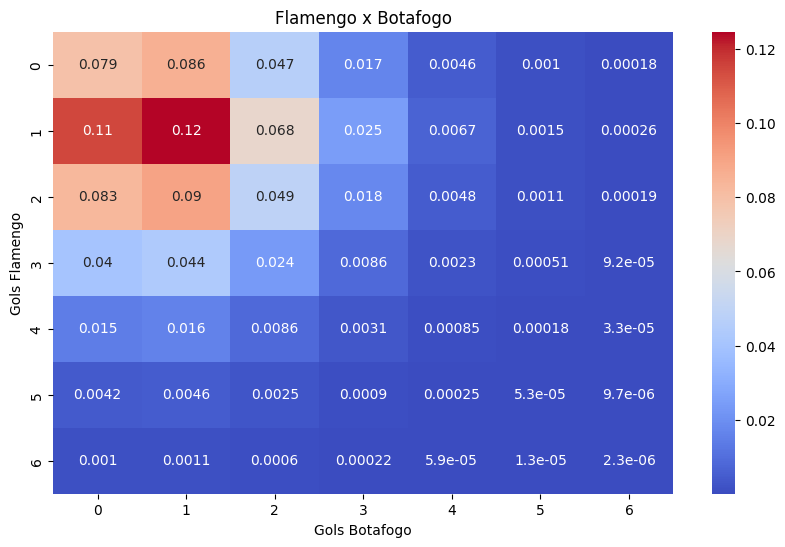

In [108]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sns

def gerar_heatMap(time_casa, time_fora):

    # Disitribuição de Poisson - Eventos independentes

    # Media esperada de gols que o time da casa tem X contra o time fora de casa
    lambda_casa = tabela_estatistica.loc[tabela_estatistica["Time"] == time_casa, "gols feitos_casa"].iloc[0] * tabela_estatistica.loc[tabela_estatistica["Time"] == time_fora, "gols sofridos_fora"].iloc[0]

    # Media esperada de gols que o time fora de casa tem X contra o time da casa
    lambda_fora = tabela_estatistica.loc[tabela_estatistica["Time"] == time_fora, "gols feitos_fora"].iloc[0] * tabela_estatistica.loc[tabela_estatistica["Time"] == time_casa, "gols sofridos_casa"].iloc[0]

    plt.figure(figsize=(10, 6))
    tabela_calculo = pd.DataFrame()

    # Considerando fazer gols eventos independentes
    for gols_casa in range(0, 7):
        for gols_fora in range(0, 7):
            prob_resultado = poisson.pmf(gols_casa, lambda_casa) * poisson.pmf(gols_fora, lambda_fora)
            tabela_calculo.loc[gols_casa, gols_fora] = prob_resultado

    sns.heatmap(tabela_calculo, annot=True, cmap="coolwarm")
    plt.title(f"{time_casa} x {time_fora}")
    plt.xlabel(f"Gols {time_fora}")
    plt.ylabel(f"Gols {time_casa}")

    heatMap = plt.gcf()
    
    return heatMap

time_c = "Flamengo"
time_f = "Botafogo"

figura_hm = gerar_heatMap(time_c, time_f)
plt.show()


## Tabela final

In [103]:
tabela_jogos_faltantes = jogos_faltantes.apply(calcular_pts_esperada, axis=1)
tabela_classificação_atualizada = tabela_classificação2024[["Equipevde", "Pts"]]
tabela_classificação_atualizada["Pts"] = tabela_classificação_atualizada["Pts"].astype(int)

pts_casa = tabela_jogos_faltantes.groupby("Casa").sum()[["pontos_casa"]]
pts_fora = tabela_jogos_faltantes.groupby("Fora").sum()[["pontos_fora"]]

def atualizar_pts (linha):
    time = linha["Equipevde"]
    pontuacao = int(linha["Pts"]) + float(pts_casa.loc[time, "pontos_casa"]) + float(pts_fora.loc[time, "pontos_fora"])
    
    return pontuacao

tabela_classificação_atualizada["Pts"] = tabela_classificação_atualizada.apply(atualizar_pts, axis=1)
# Renomear a coluna
tabela_classificação_atualizada = tabela_classificação_atualizada.rename(columns={"Equipevde": "Time", "Pts": "Pontos"})
tabela_classificação_atualizada = tabela_classificação_atualizada.sort_values(by="Pontos", ascending=False).reset_index(drop=True)
tabela_classificação_atualizada.index = tabela_classificação_atualizada.index + 1

#salvando a tabela em json em utf-8
tabela_classificação_atualizada.to_json("classificação.json", orient="records", force_ascii=False)
#display(tabela_classificação_atualizada)

,0,1,2,3,4,5,6
0,0.064627,0.118014,0.107752,0.065588,0.029942,0.010935,0.003328
1,0.059007,0.107752,0.098382,0.059885,0.027339,0.009985,0.003039
2,0.026938,0.049191,0.044913,0.027339,0.012481,0.004558,0.001387
3,0.008198,0.014971,0.013669,0.008320,0.003798,0.001387,0.000422
4,0.001871,0.003417,0.003120,0.001899,0.000867,0.000317,0.000096
5,0.000342,0.000624,0.000570,0.000347,0.000158,0.000058,0.000018
6,0.000052,0.000095,0.000087,0.000053,0.000024,0.000009,0.000003


,0,1,2,3,4,5,6
0,0.076297,0.056997,0.021289,0.005301,0.000990,0.000148,1.841714e-05
1,0.139325,0.104081,0.038876,0.009681,0.001808,0.000270,3.363131e-05
2,0.127210,0.095030,0.035495,0.008839,0.001651,0.000247,3.070685e-05
3,0.077432,0.057844,0.021606,0.005380,0.001005,0.000150,1.869112e-05
4,0.035349,0.026407,0.009864,0.002456,0.000459,0.000069,8.532904e-06
5,0.012910,0.009644,0.003602,0.000897,0.000168,0.000025,3.116365e-06
6,0.003929,0.002935,0.001096,0.000273,0.000051,0.000008,9.484589e-07


,0,1,2,3,4,5,6
0,0.069047,0.060302,0.026332,0.007666,0.001674,0.000292,0.000043
1,0.124258,0.108521,0.047388,0.013795,0.003012,0.000526,0.000077
2,0.111809,0.097648,0.042640,0.012413,0.002710,0.000473,0.000069
3,0.067071,0.058577,0.025579,0.007446,0.001626,0.000284,0.000041
4,0.030176,0.026354,0.011508,0.003350,0.000731,0.000128,0.000019
5,0.010861,0.009485,0.004142,0.001206,0.000263,0.000046,0.000007
6,0.003258,0.002845,0.001242,0.000362,0.000079,0.000014,0.000002


,0,1,2,3,4,5,6
0,0.044030,0.034958,0.013877,0.003673,0.000729,0.000116,0.000015
1,0.102544,0.081415,0.032320,0.008553,0.001698,0.000270,0.000036
2,0.119408,0.094804,0.037635,0.009960,0.001977,0.000314,0.000042
3,0.092697,0.073597,0.029216,0.007732,0.001535,0.000244,0.000032
4,0.053971,0.042850,0.017011,0.004502,0.000894,0.000142,0.000019
5,0.025139,0.019959,0.007923,0.002097,0.000416,0.000066,0.000009
6,0.009758,0.007747,0.003075,0.000814,0.000162,0.000026,0.000003


,0,1,2,3,4,5,6
0,0.077182,0.076343,0.037756,0.012449,0.003078,0.000609,0.000100
1,0.121365,0.120046,0.059371,0.019575,0.004841,0.000958,0.000158
2,0.095421,0.094384,0.046679,0.015391,0.003806,0.000753,0.000124
3,0.050015,0.049472,0.024467,0.008067,0.001995,0.000395,0.000065
4,0.019662,0.019448,0.009618,0.003171,0.000784,0.000155,0.000026
5,0.006184,0.006116,0.003025,0.000997,0.000247,0.000049,0.000008
6,0.001621,0.001603,0.000793,0.000261,0.000065,0.000013,0.000002


,0,1,2,3,4,5,6
0,0.016429,0.037501,0.042801,0.032566,0.018584,0.008484,0.003228
1,0.030001,0.068481,0.078157,0.059468,0.033935,0.015492,0.005894
2,0.027392,0.062526,0.071361,0.054297,0.030984,0.014145,0.005381
3,0.016674,0.038059,0.043437,0.033050,0.018860,0.008610,0.003276
4,0.007612,0.017375,0.019830,0.015088,0.008610,0.003931,0.001495
5,0.002780,0.006346,0.007242,0.005510,0.003145,0.001436,0.000546
6,0.000846,0.001931,0.002204,0.001677,0.000957,0.000437,0.000166


,0,1,2,3,4,5,6
0,0.123819,0.107914,0.047026,0.013662,0.002977,0.000519,7.536747e-05
1,0.150736,0.131373,0.057249,0.016631,0.003624,0.000632,9.175171e-05
2,0.091753,0.079966,0.034847,0.010124,0.002206,0.000384,5.584886e-05
3,0.037233,0.032450,0.014141,0.004108,0.000895,0.000156,2.266331e-05
4,0.011332,0.009876,0.004304,0.001250,0.000272,0.000047,6.897528e-06
5,0.002759,0.002405,0.001048,0.000304,0.000066,0.000012,1.679398e-06
6,0.000560,0.000488,0.000213,0.000062,0.000013,0.000002,3.407475e-07


,0,1,2,3,4,5,6
0,0.083283,0.088715,0.047250,0.016777,0.004468,0.000952,0.000169
1,0.118286,0.126001,0.067109,0.023829,0.006346,0.001352,0.000240
2,0.084001,0.089479,0.047657,0.016922,0.004506,0.000960,0.000170
3,0.039768,0.042362,0.022562,0.008011,0.002133,0.000455,0.000081
4,0.014121,0.015042,0.008011,0.002845,0.000758,0.000161,0.000029
5,0.004011,0.004273,0.002276,0.000808,0.000215,0.000046,0.000008
6,0.000949,0.001011,0.000539,0.000191,0.000051,0.000011,0.000002


,0,1,2,3,4,5,6
0,0.083100,0.065977,0.026191,0.006932,0.001376,0.000218,2.890875e-05
1,0.140751,0.111750,0.044362,0.011740,0.002330,0.000370,4.896454e-05
2,0.119200,0.094639,0.037569,0.009943,0.001974,0.000313,4.146713e-05
3,0.067299,0.053432,0.021211,0.005614,0.001114,0.000177,2.341182e-05
4,0.028497,0.022625,0.008982,0.002377,0.000472,0.000075,9.913510e-06
5,0.009653,0.007664,0.003043,0.000805,0.000160,0.000025,3.358225e-06
6,0.002725,0.002164,0.000859,0.000227,0.000045,0.000007,9.480055e-07


,0,1,2,3,4,5,6
0,0.046475,0.045970,0.022735,0.007496,0.001854,0.000367,0.000060
1,0.096655,0.095604,0.047282,0.015589,0.003855,0.000763,0.000126
2,0.100507,0.099414,0.049167,0.016211,0.004009,0.000793,0.000131
3,0.069675,0.068918,0.034084,0.011238,0.002779,0.000550,0.000091
4,0.036226,0.035832,0.017721,0.005843,0.001445,0.000286,0.000047
5,0.015068,0.014904,0.007371,0.002430,0.000601,0.000119,0.000020
6,0.005223,0.005166,0.002555,0.000842,0.000208,0.000041,0.000007


,0,1,2,3,4,5,6
0,0.061999,0.059181,0.028246,0.008987,0.002145,0.000409,0.000065
1,0.113216,0.108070,0.051579,0.016411,0.003916,0.000748,0.000119
2,0.103371,0.098673,0.047094,0.014984,0.003576,0.000683,0.000109
3,0.062922,0.060062,0.028666,0.009121,0.002177,0.000416,0.000066
4,0.028725,0.027419,0.013087,0.004164,0.000994,0.000190,0.000030
5,0.010491,0.010014,0.004779,0.001521,0.000363,0.000069,0.000011
6,0.003193,0.003048,0.001455,0.000463,0.000110,0.000021,0.000003


,0,1,2,3,4,5,6
0,0.082234,0.059441,0.021483,0.005176,0.000935,0.000135,1.629000e-05
1,0.145995,0.105529,0.038140,0.009189,0.001661,0.000240,2.892064e-05
2,0.129597,0.093676,0.033856,0.008157,0.001474,0.000213,2.567231e-05
3,0.076694,0.055436,0.020035,0.004827,0.000872,0.000126,1.519255e-05
4,0.034040,0.024605,0.008893,0.002143,0.000387,0.000056,6.743071e-06
5,0.012087,0.008737,0.003157,0.000761,0.000137,0.000020,2.394279e-06
6,0.003576,0.002585,0.000934,0.000225,0.000041,0.000006,7.084521e-07


,0,1,2,3,4,5,6
0,0.087617,0.055651,0.017674,0.003742,0.000594,0.000075,7.990179e-06
1,0.157677,0.100150,0.031806,0.006734,0.001069,0.000136,1.437930e-05
2,0.141880,0.090116,0.028619,0.006059,0.000962,0.000122,1.293865e-05
3,0.085110,0.054058,0.017168,0.003635,0.000577,0.000073,7.761561e-06
4,0.038291,0.024321,0.007724,0.001635,0.000260,0.000033,3.491969e-06
5,0.013782,0.008754,0.002780,0.000589,0.000093,0.000012,1.256845e-06
6,0.004134,0.002626,0.000834,0.000177,0.000028,0.000004,3.769742e-07


,0,1,2,3,4,5,6
0,0.057219,0.094038,0.077275,0.042333,0.017393,0.005717,0.001566
1,0.069658,0.114481,0.094074,0.051536,0.021175,0.006960,0.001906
2,0.042400,0.069684,0.057262,0.031370,0.012889,0.004237,0.001160
3,0.017206,0.028278,0.023237,0.012730,0.005230,0.001719,0.000471
4,0.005237,0.008606,0.007072,0.003874,0.001592,0.000523,0.000143
5,0.001275,0.002095,0.001722,0.000943,0.000388,0.000127,0.000035
6,0.000259,0.000425,0.000349,0.000191,0.000079,0.000026,0.000007


,0,1,2,3,4,5,6
0,0.060656,0.080765,0.053770,0.023865,0.007944,0.002116,0.000469
1,0.089226,0.118806,0.079097,0.035106,0.011686,0.003112,0.000691
2,0.065626,0.087383,0.058176,0.025821,0.008595,0.002289,0.000508
3,0.032179,0.042847,0.028526,0.012661,0.004215,0.001122,0.000249
4,0.011834,0.015757,0.010491,0.004656,0.001550,0.000413,0.000092
5,0.003482,0.004636,0.003086,0.001370,0.000456,0.000121,0.000027
6,0.000854,0.001137,0.000757,0.000336,0.000112,0.000030,0.000007


,0,1,2,3,4,5,6
0,0.099427,0.086998,0.038062,0.011101,0.002428,0.000425,6.197541e-05
1,0.142512,0.124698,0.054555,0.015912,0.003481,0.000609,8.883142e-05
2,0.102133,0.089367,0.039098,0.011404,0.002495,0.000437,6.366252e-05
3,0.048797,0.042697,0.018680,0.005448,0.001192,0.000209,3.041654e-05
4,0.017486,0.015300,0.006694,0.001952,0.000427,0.000075,1.089926e-05
5,0.005013,0.004386,0.001919,0.000560,0.000122,0.000021,3.124454e-06
6,0.001197,0.001048,0.000458,0.000134,0.000029,0.000005,7.463974e-07


,0,1,2,3,4,5,6
0,0.132897,0.108734,0.044482,0.012131,0.002481,0.000406,5.537085e-05
1,0.159476,0.130481,0.053378,0.014558,0.002978,0.000487,6.644502e-05
2,0.095686,0.078288,0.032027,0.008735,0.001787,0.000292,3.986701e-05
3,0.038274,0.031315,0.012811,0.003494,0.000715,0.000117,1.594681e-05
4,0.011482,0.009395,0.003843,0.001048,0.000214,0.000035,4.784042e-06
5,0.002756,0.002255,0.000922,0.000252,0.000051,0.000008,1.148170e-06
6,0.000551,0.000451,0.000184,0.000050,0.000010,0.000002,2.296340e-07


,0,1,2,3,4,5,6
0,0.117757,0.112637,0.053870,0.017176,0.004107,0.000786,1.252634e-04
1,0.139261,0.133206,0.063707,0.020312,0.004857,0.000929,1.481375e-04
2,0.082345,0.078765,0.037670,0.012011,0.002872,0.000549,8.759437e-05
3,0.032461,0.031049,0.014850,0.004735,0.001132,0.000217,3.452995e-05
4,0.009597,0.009180,0.004390,0.001400,0.000335,0.000064,1.020886e-05
5,0.002270,0.002171,0.001038,0.000331,0.000079,0.000015,2.414616e-06
6,0.000447,0.000428,0.000205,0.000065,0.000016,0.000003,4.759244e-07


,0,1,2,3,4,5,6
0,0.120432,0.130468,0.070670,0.025520,0.006912,0.001498,2.703856e-04
1,0.124447,0.134817,0.073026,0.026371,0.007142,0.001547,2.793984e-04
2,0.064298,0.069656,0.037730,0.013625,0.003690,0.000800,1.443558e-04
3,0.022147,0.023993,0.012996,0.004693,0.001271,0.000275,4.972257e-05
4,0.005721,0.006198,0.003357,0.001212,0.000328,0.000071,1.284500e-05
5,0.001182,0.001281,0.000694,0.000251,0.000068,0.000015,2.654633e-06
6,0.000204,0.000221,0.000119,0.000043,0.000012,0.000003,4.571867e-07


,0,1,2,3,4,5,6
0,0.024724,0.061809,0.077261,0.064384,0.040240,0.020120,0.008383
1,0.029668,0.074171,0.092713,0.077261,0.048288,0.024144,0.010060
2,0.017801,0.044502,0.055628,0.046357,0.028973,0.014486,0.006036
3,0.007120,0.017801,0.022251,0.018543,0.011589,0.005795,0.002414
4,0.002136,0.005340,0.006675,0.005563,0.003477,0.001738,0.000724
5,0.000513,0.001282,0.001602,0.001335,0.000834,0.000417,0.000174
6,0.000103,0.000256,0.000320,0.000267,0.000167,0.000083,0.000035


C:\Users\Thiago\AppData\Local\Temp\ipykernel_13288\136343758.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


,0,1,2,3,4,5,6
0,0.172986,0.165123,0.078809,0.025075,0.005984,1.142385e-03,1.817430e-04
1,0.138389,0.132098,0.063047,0.020060,0.004787,9.139078e-04,1.453944e-04
2,0.055355,0.052839,0.025219,0.008024,0.001915,3.655631e-04,5.815777e-05
3,0.014761,0.014090,0.006725,0.002140,0.000511,9.748350e-05,1.550874e-05
4,0.002952,0.002818,0.001345,0.000428,0.000102,1.949670e-05,3.101748e-06
5,0.000472,0.000451,0.000215,0.000068,0.000016,3.119472e-06,4.962796e-07
6,0.000063,0.000060,0.000029,0.000009,0.000002,4.159296e-07,6.617062e-08


,0,1,2,3,4,5,6
0,0.122456,0.142866,0.083338,0.032409,0.009453,0.002206,4.288741e-04
1,0.114293,0.133341,0.077783,0.030249,0.008823,0.002059,4.002825e-04
2,0.053337,0.062226,0.036299,0.014116,0.004117,0.000961,1.867985e-04
3,0.016594,0.019359,0.011293,0.004392,0.001281,0.000299,5.811509e-05
4,0.003872,0.004517,0.002635,0.001025,0.000299,0.000070,1.356019e-05
5,0.000723,0.000843,0.000492,0.000191,0.000056,0.000013,2.531235e-06
6,0.000112,0.000131,0.000077,0.000030,0.000009,0.000002,3.937477e-07


,0,1,2,3,4,5,6
0,0.137710,0.119747,0.052064,0.015091,0.003281,0.000571,8.268837e-05
1,0.153277,0.133284,0.057950,0.016797,0.003652,0.000635,9.203575e-05
2,0.085302,0.074175,0.032250,0.009348,0.002032,0.000353,5.121990e-05
3,0.031648,0.027520,0.011965,0.003468,0.000754,0.000131,1.900332e-05
4,0.008806,0.007658,0.003329,0.000965,0.000210,0.000036,5.287882e-06
5,0.001960,0.001705,0.000741,0.000215,0.000047,0.000008,1.177128e-06
6,0.000364,0.000316,0.000137,0.000040,0.000009,0.000002,2.183659e-07


,0,1,2,3,4,5,6
0,0.120870,0.120870,0.060435,0.020145,0.005036,0.001007,1.678744e-04
1,0.134533,0.134533,0.067267,0.022422,0.005606,0.001121,1.868515e-04
2,0.074871,0.074871,0.037435,0.012478,0.003120,0.000624,1.039869e-04
3,0.027778,0.027778,0.013889,0.004630,0.001157,0.000231,3.858065e-05
4,0.007730,0.007730,0.003865,0.001288,0.000322,0.000064,1.073548e-05
5,0.001721,0.001721,0.000860,0.000287,0.000072,0.000014,2.389812e-06
6,0.000319,0.000319,0.000160,0.000053,0.000013,0.000003,4.433275e-07


,0,1,2,3,4,5,6
0,0.111771,0.097192,0.042257,0.012249,0.002663,0.000463,6.711337e-05
1,0.147732,0.128463,0.055853,0.016189,0.003519,0.000612,8.870637e-05
2,0.097632,0.084897,0.036912,0.010699,0.002326,0.000405,5.862334e-05
3,0.043014,0.037404,0.016263,0.004714,0.001025,0.000178,2.582826e-05
4,0.014213,0.012360,0.005374,0.001558,0.000339,0.000059,8.534554e-06
5,0.003757,0.003267,0.001421,0.000412,0.000090,0.000016,2.256091e-06
6,0.000828,0.000720,0.000313,0.000091,0.000020,0.000003,4.969939e-07


,0,1,2,3,4,5,6
0,0.143829,0.093801,0.030587,0.006649,0.001084,1.414107e-04,1.537073e-05
1,0.185102,0.120718,0.039365,0.008558,0.001395,1.819894e-04,1.978146e-05
2,0.119109,0.077680,0.025330,0.005507,0.000898,1.171062e-04,1.272894e-05
3,0.051096,0.033323,0.010866,0.002362,0.000385,5.023687e-05,5.460530e-06
4,0.016440,0.010721,0.003496,0.000760,0.000124,1.616317e-05,1.756866e-06
5,0.004231,0.002760,0.000900,0.000196,0.000032,4.160259e-06,4.522020e-07
6,0.000908,0.000592,0.000193,0.000042,0.000007,8.923454e-07,9.699406e-08


,0,1,2,3,4,5,6
0,0.141093,0.111699,0.044214,0.011668,0.002309,0.000366,4.824233e-05
1,0.164609,0.130315,0.051583,0.013612,0.002694,0.000427,5.628272e-05
2,0.096022,0.076017,0.030090,0.007940,0.001572,0.000249,3.283159e-05
3,0.037342,0.029562,0.011702,0.003088,0.000611,0.000097,1.276784e-05
4,0.010891,0.008622,0.003413,0.000901,0.000178,0.000028,3.723953e-06
5,0.002541,0.002012,0.000796,0.000210,0.000042,0.000007,8.689224e-07
6,0.000494,0.000391,0.000155,0.000041,0.000008,0.000001,1.689571e-07


,0,1,2,3,4,5,6
0,0.152856,0.106334,0.036986,0.008576,0.001492,2.075206e-04,2.406036e-05
1,0.180768,0.125752,0.043740,0.010143,0.001764,2.454156e-04,2.845399e-05
2,0.106889,0.074358,0.025864,0.005997,0.001043,1.451153e-04,1.682497e-05
3,0.042136,0.029312,0.010195,0.002364,0.000411,5.720488e-05,6.632450e-06
4,0.012458,0.008666,0.003014,0.000699,0.000122,1.691275e-05,1.960898e-06
5,0.002946,0.002050,0.000713,0.000165,0.000029,4.000233e-06,4.637951e-07
6,0.000581,0.000404,0.000141,0.000033,0.000006,7.884517e-07,9.141468e-08


,0,1,2,3,4,5,6
0,0.088478,0.129031,0.094085,0.045736,0.016674,0.004863,0.001182
1,0.085529,0.124730,0.090949,0.044211,0.016119,0.004701,0.001143
2,0.041339,0.060286,0.043959,0.021369,0.007791,0.002272,0.000552
3,0.013320,0.019425,0.014164,0.006885,0.002510,0.000732,0.000178
4,0.003219,0.004694,0.003423,0.001664,0.000607,0.000177,0.000043
5,0.000622,0.000908,0.000662,0.000322,0.000117,0.000034,0.000008
6,0.000100,0.000146,0.000107,0.000052,0.000019,0.000006,0.000001


,0,1,2,3,4,5,6
0,0.069989,0.082541,0.048672,0.019134,0.005641,0.001331,0.000262
1,0.103588,0.122167,0.072039,0.028320,0.008350,0.001969,0.000387
2,0.076659,0.090408,0.053311,0.020957,0.006179,0.001457,0.000286
3,0.037820,0.044603,0.026301,0.010340,0.003048,0.000719,0.000141
4,0.013994,0.016504,0.009732,0.003826,0.001128,0.000266,0.000052
5,0.004142,0.004885,0.002881,0.001132,0.000334,0.000079,0.000015
6,0.001022,0.001205,0.000711,0.000279,0.000082,0.000019,0.000004


,0,1,2,3,4,5,6
0,0.036326,0.097923,0.131983,0.118593,0.079921,0.043088,0.019358
1,0.022506,0.060669,0.081772,0.073476,0.049517,0.026696,0.011994
2,0.006972,0.018794,0.025332,0.022762,0.015339,0.008270,0.003715
3,0.001440,0.003881,0.005232,0.004701,0.003168,0.001708,0.000767
4,0.000223,0.000601,0.000810,0.000728,0.000491,0.000265,0.000119
5,0.000028,0.000074,0.000100,0.000090,0.000061,0.000033,0.000015
6,0.000003,0.000008,0.000010,0.000009,0.000006,0.000003,0.000002


,0,1,2,3,4,5,6
0,0.081236,0.104731,0.067511,0.029012,0.009351,0.002411,0.000518
1,0.099203,0.127895,0.082443,0.035429,0.011419,0.002944,0.000633
2,0.060572,0.078091,0.050338,0.021633,0.006972,0.001798,0.000386
3,0.024656,0.031788,0.020491,0.008806,0.002838,0.000732,0.000157
4,0.007527,0.009705,0.006256,0.002688,0.000866,0.000223,0.000048
5,0.001838,0.002370,0.001528,0.000657,0.000212,0.000055,0.000012
6,0.000374,0.000482,0.000311,0.000134,0.000043,0.000011,0.000002


,0,1,2,3,4,5,6
0,0.063777,0.074748,0.043803,0.017113,0.005014,0.001175,0.000230
1,0.100789,0.118127,0.069224,0.027044,0.007924,0.001857,0.000363
2,0.079641,0.093341,0.054699,0.021369,0.006261,0.001468,0.000287
3,0.041953,0.049170,0.028814,0.011257,0.003298,0.000773,0.000151
4,0.016575,0.019426,0.011384,0.004447,0.001303,0.000305,0.000060
5,0.005239,0.006140,0.003598,0.001406,0.000412,0.000097,0.000019
6,0.001380,0.001617,0.000948,0.000370,0.000108,0.000025,0.000005


,0,1,2,3,4,5,6
0,0.009965,0.033577,0.056570,0.063539,0.053525,0.036071,0.020257
1,0.012348,0.041606,0.070098,0.078733,0.066324,0.044697,0.025101
2,0.007650,0.025778,0.043430,0.048780,0.041092,0.027692,0.015552
3,0.003160,0.010647,0.017939,0.020148,0.016973,0.011438,0.006424
4,0.000979,0.003298,0.005557,0.006242,0.005258,0.003543,0.001990
5,0.000243,0.000817,0.001377,0.001547,0.001303,0.000878,0.000493
6,0.000050,0.000169,0.000284,0.000319,0.000269,0.000181,0.000102


,0,1,2,3,4,5,6
0,0.120917,0.155568,0.100074,0.042917,0.013804,0.003552,7.616209e-04
1,0.099888,0.128512,0.082669,0.035453,0.011403,0.002934,6.291651e-04
2,0.041258,0.053081,0.034146,0.014644,0.004710,0.001212,2.598725e-04
3,0.011361,0.014617,0.009403,0.004032,0.001297,0.000334,7.155911e-05
4,0.002346,0.003019,0.001942,0.000833,0.000268,0.000069,1.477851e-05
5,0.000388,0.000499,0.000321,0.000138,0.000044,0.000011,2.441667e-06
6,0.000053,0.000069,0.000044,0.000019,0.000006,0.000002,3.361716e-07


,0,1,2,3,4,5,6
0,0.098140,0.115022,0.067404,0.026333,0.007716,0.001809,0.000353
1,0.112796,0.132199,0.077470,0.030266,0.008868,0.002079,0.000406
2,0.064820,0.075971,0.044520,0.017393,0.005096,0.001195,0.000233
3,0.024834,0.029105,0.017056,0.006663,0.001952,0.000458,0.000089
4,0.007136,0.008363,0.004901,0.001915,0.000561,0.000131,0.000026
5,0.001640,0.001922,0.001127,0.000440,0.000129,0.000030,0.000006
6,0.000314,0.000368,0.000216,0.000084,0.000025,0.000006,0.000001


,0,1,2,3,4,5,6
0,0.082318,0.110950,0.074771,0.033593,0.011319,0.003051,0.000685
1,0.094611,0.127520,0.085937,0.038609,0.013010,0.003507,0.000788
2,0.054370,0.073282,0.049385,0.022188,0.007476,0.002015,0.000453
3,0.020830,0.028075,0.018920,0.008500,0.002864,0.000772,0.000173
4,0.005985,0.008067,0.005436,0.002442,0.000823,0.000222,0.000050
5,0.001376,0.001854,0.001250,0.000561,0.000189,0.000051,0.000011
6,0.000264,0.000355,0.000239,0.000108,0.000036,0.000010,0.000002


,0,1,2,3,4,5,6
0,0.079114,0.092724,0.054337,0.021228,0.006220,0.001458,0.000285
1,0.107978,0.126553,0.074161,0.028973,0.008489,0.001990,0.000389
2,0.073686,0.086362,0.050609,0.019772,0.005793,0.001358,0.000265
3,0.033523,0.039290,0.023024,0.008995,0.002636,0.000618,0.000121
4,0.011439,0.013406,0.007856,0.003069,0.000899,0.000211,0.000041
5,0.003122,0.003659,0.002144,0.000838,0.000245,0.000058,0.000011
6,0.000710,0.000832,0.000488,0.000191,0.000056,0.000013,0.000003


,0,1,2,3,4,5,6
0,0.070777,0.099731,0.070265,0.033003,0.011626,0.003276,0.000769
1,0.087702,0.123580,0.087068,0.040895,0.014406,0.004060,0.000953
2,0.054337,0.076566,0.053944,0.025337,0.008926,0.002515,0.000591
3,0.022444,0.031625,0.022281,0.010465,0.003687,0.001039,0.000244
4,0.006953,0.009797,0.006902,0.003242,0.001142,0.000322,0.000076
5,0.001723,0.002428,0.001711,0.000803,0.000283,0.000080,0.000019
6,0.000356,0.000501,0.000353,0.000166,0.000058,0.000016,0.000004


,0,1,2,3,4,5,6
0,0.181496,0.122313,0.041214,0.009258,0.001560,2.102350e-04,2.361336e-05
1,0.187414,0.126301,0.042558,0.009560,0.001611,2.170905e-04,2.438336e-05
2,0.096763,0.065210,0.021973,0.004936,0.000832,1.120848e-04,1.258923e-05
3,0.033306,0.022445,0.007563,0.001699,0.000286,3.857991e-05,4.333250e-06
4,0.008598,0.005794,0.001952,0.000439,0.000074,9.959487e-06,1.118638e-06
5,0.001776,0.001197,0.000403,0.000091,0.000015,2.056851e-06,2.310231e-07
6,0.000306,0.000206,0.000069,0.000016,0.000003,3.539870e-07,3.975940e-08


,0,1,2,3,4,5,6
0,0.109927,0.096628,0.042469,0.012444,0.002735,0.000481,7.042960e-05
1,0.146084,0.128411,0.056438,0.016537,0.003634,0.000639,9.359548e-05
2,0.097067,0.085324,0.037501,0.010988,0.002415,0.000425,6.219057e-05
3,0.042998,0.037796,0.016612,0.004867,0.001070,0.000188,2.754882e-05
4,0.014285,0.012557,0.005519,0.001617,0.000355,0.000062,9.152561e-06
5,0.003797,0.003337,0.001467,0.000430,0.000094,0.000017,2.432609e-06
6,0.000841,0.000739,0.000325,0.000095,0.000021,0.000004,5.387914e-07


,0,1,2,3,4,5,6
0,0.115465,0.108262,0.050754,0.015863,0.003718,0.000697,1.089614e-04
1,0.141002,0.132206,0.061980,0.019371,0.004541,0.000851,1.330607e-04
2,0.086094,0.080723,0.037844,0.011828,0.002772,0.000520,8.124499e-05
3,0.035045,0.032859,0.015405,0.004815,0.001129,0.000212,3.307137e-05
4,0.010699,0.010032,0.004703,0.001470,0.000345,0.000065,1.009646e-05
5,0.002613,0.002450,0.001149,0.000359,0.000084,0.000016,2.465902e-06
6,0.000532,0.000499,0.000234,0.000073,0.000017,0.000003,5.018818e-07


,0,1,2,3,4,5,6
0,0.038690,0.093865,0.113863,0.092080,0.055849,0.027099,0.010957
1,0.031961,0.077541,0.094061,0.076066,0.046136,0.022386,0.009052
2,0.013201,0.032028,0.038851,0.031419,0.019056,0.009246,0.003739
3,0.003635,0.008819,0.010698,0.008652,0.005247,0.002546,0.001030
4,0.000751,0.001821,0.002209,0.001787,0.001084,0.000526,0.000213
5,0.000124,0.000301,0.000365,0.000295,0.000179,0.000087,0.000035
6,0.000017,0.000041,0.000050,0.000041,0.000025,0.000012,0.000005


,0,1,2,3,4,5,6
0,0.051624,0.101471,0.099725,0.065339,0.032107,0.012622,0.004135
1,0.051531,0.101287,0.099544,0.065221,0.032049,0.012599,0.004127
2,0.025719,0.050552,0.049682,0.032551,0.015996,0.006288,0.002060
3,0.008557,0.016820,0.016531,0.010831,0.005322,0.002092,0.000685
4,0.002135,0.004197,0.004125,0.002703,0.001328,0.000522,0.000171
5,0.000426,0.000838,0.000824,0.000540,0.000265,0.000104,0.000034
6,0.000071,0.000139,0.000137,0.000090,0.000044,0.000017,0.000006


,0,1,2,3,4,5,6
0,0.017538,0.018542,0.009802,0.003455,0.000913,0.000193,0.000034
1,0.052370,0.055370,0.029271,0.010316,0.002727,0.000577,0.000102
2,0.078191,0.082670,0.043703,0.015402,0.004071,0.000861,0.000152
3,0.077829,0.082288,0.043501,0.015331,0.004052,0.000857,0.000151
4,0.058101,0.061430,0.032475,0.011445,0.003025,0.000640,0.000113
5,0.034699,0.036687,0.019395,0.006835,0.001807,0.000382,0.000067
6,0.017269,0.018259,0.009652,0.003402,0.000899,0.000190,0.000034


,0,1,2,3,4,5,6
0,0.025562,0.061774,0.074643,0.060129,0.036328,0.017559,0.007072
1,0.031952,0.077217,0.093304,0.075162,0.045410,0.021948,0.008840
2,0.019970,0.048261,0.058315,0.046976,0.028381,0.013718,0.005525
3,0.008321,0.020109,0.024298,0.019573,0.011826,0.005716,0.002302
4,0.002600,0.006284,0.007593,0.006117,0.003695,0.001786,0.000719
5,0.000650,0.001571,0.001898,0.001529,0.000924,0.000447,0.000180
6,0.000135,0.000327,0.000395,0.000319,0.000192,0.000093,0.000037


,0,1,2,3,4,5,6
0,0.031373,0.041068,0.026880,0.011729,0.003838,0.001005,0.000219
1,0.067539,0.088411,0.057866,0.025249,0.008263,0.002163,0.000472
2,0.072698,0.095164,0.062286,0.027178,0.008894,0.002329,0.000508
3,0.052168,0.068289,0.044696,0.019503,0.006382,0.001671,0.000365
4,0.028076,0.036753,0.024055,0.010496,0.003435,0.000899,0.000196
5,0.012088,0.015824,0.010357,0.004519,0.001479,0.000387,0.000084
6,0.004337,0.005678,0.003716,0.001621,0.000531,0.000139,0.000030


,0,1,2,3,4,5,6
0,0.059601,0.068745,0.039645,0.015242,0.004395,0.001014,0.000195
1,0.099336,0.114575,0.066076,0.025404,0.007325,0.001690,0.000325
2,0.082780,0.095479,0.055063,0.021170,0.006104,0.001408,0.000271
3,0.045989,0.053044,0.030591,0.011761,0.003391,0.000782,0.000150
4,0.019162,0.022102,0.012746,0.004900,0.001413,0.000326,0.000063
5,0.006387,0.007367,0.004249,0.001633,0.000471,0.000109,0.000021
6,0.001774,0.002046,0.001180,0.000454,0.000131,0.000030,0.000006


,0,1,2,3,4,5,6
0,0.034938,0.049254,0.034717,0.016314,0.005749,0.001621,0.000381
1,0.067936,0.095771,0.067505,0.031721,0.011180,0.003152,0.000741
2,0.066049,0.093110,0.065630,0.030840,0.010869,0.003064,0.000720
3,0.042809,0.060349,0.042538,0.019989,0.007045,0.001986,0.000467
4,0.020810,0.029337,0.020678,0.009717,0.003425,0.000966,0.000227
5,0.008093,0.011409,0.008042,0.003779,0.001332,0.000375,0.000088
6,0.002623,0.003697,0.002606,0.001225,0.000432,0.000122,0.000029


,0,1,2,3,4,5,6
0,0.034405,0.036150,0.018992,0.006652,0.001747,0.000367,0.000064
1,0.079779,0.083826,0.044039,0.015424,0.004052,0.000851,0.000149
2,0.092497,0.097189,0.051059,0.017883,0.004698,0.000987,0.000173
3,0.071495,0.075122,0.039466,0.013823,0.003631,0.000763,0.000134
4,0.041447,0.043549,0.022879,0.008013,0.002105,0.000442,0.000077
5,0.019222,0.020197,0.010611,0.003716,0.000976,0.000205,0.000036
6,0.007429,0.007805,0.004101,0.001436,0.000377,0.000079,0.000014


,0,1,2,3,4,5,6
0,0.015666,0.020507,0.013422,0.005857,0.001917,0.000502,0.000109
1,0.044605,0.058389,0.038217,0.016676,0.005457,0.001429,0.000312
2,0.063500,0.083124,0.054406,0.023740,0.007769,0.002034,0.000444
3,0.060267,0.078891,0.051635,0.022531,0.007373,0.001930,0.000421
4,0.042898,0.056155,0.036754,0.016037,0.005248,0.001374,0.000300
5,0.024428,0.031977,0.020929,0.009132,0.002989,0.000782,0.000171
6,0.011592,0.015174,0.009932,0.004334,0.001418,0.000371,0.000081


,0,1,2,3,4,5,6
0,0.029388,0.035510,0.021454,0.008641,0.002610,0.000631,0.000127
1,0.068146,0.082343,0.049749,0.020038,0.006053,0.001463,0.000295
2,0.079010,0.095470,0.057680,0.023232,0.007018,0.001696,0.000342
3,0.061070,0.073793,0.044583,0.017957,0.005425,0.001311,0.000264
4,0.035403,0.042779,0.025845,0.010410,0.003145,0.000760,0.000153
5,0.016419,0.019839,0.011986,0.004828,0.001458,0.000352,0.000071
6,0.006345,0.007667,0.004632,0.001866,0.000564,0.000136,0.000027


,0,1,2,3,4,5,6
0,0.022274,0.023404,0.012295,0.004306,0.001131,0.000238,0.000042
1,0.061333,0.064445,0.033857,0.011858,0.003115,0.000655,0.000115
2,0.084445,0.088728,0.046614,0.016326,0.004289,0.000901,0.000158
3,0.077510,0.081441,0.042786,0.014985,0.003936,0.000827,0.000145
4,0.053358,0.056065,0.029454,0.010316,0.002710,0.000569,0.000100
5,0.029386,0.030876,0.016221,0.005681,0.001492,0.000314,0.000055
6,0.013486,0.014170,0.007444,0.002607,0.000685,0.000144,0.000025


,0,1,2,3,4,5,6
0,0.068051,0.041114,0.012420,0.002501,0.000378,0.000046,4.596652e-06
1,0.141773,0.085654,0.025875,0.005211,0.000787,0.000095,9.576359e-06
2,0.147680,0.089223,0.026953,0.005428,0.000820,0.000099,9.975374e-06
3,0.102555,0.061961,0.018717,0.003769,0.000569,0.000069,6.927343e-06
4,0.053414,0.032271,0.009749,0.001963,0.000297,0.000036,3.607991e-06
5,0.022256,0.013446,0.004062,0.000818,0.000124,0.000015,1.503330e-06
6,0.007728,0.004669,0.001410,0.000284,0.000043,0.000005,5.219895e-07


,0,1,2,3,4,5,6
0,0.031142,0.024541,0.009670,0.002540,0.000500,0.000079,0.000010
1,0.083496,0.065799,0.025926,0.006810,0.001342,0.000211,0.000028
2,0.111933,0.088208,0.034756,0.009130,0.001799,0.000283,0.000037
3,0.100037,0.078834,0.031062,0.008159,0.001607,0.000253,0.000033
4,0.067054,0.052841,0.020821,0.005469,0.001077,0.000170,0.000022
5,0.035956,0.028335,0.011165,0.002933,0.000578,0.000091,0.000012
6,0.016067,0.012662,0.004989,0.001311,0.000258,0.000041,0.000005


,0,1,2,3,4,5,6
0,0.033805,0.032338,0.015467,0.004932,0.001179,0.000226,0.000036
1,0.082164,0.078598,0.037593,0.011987,0.002867,0.000548,0.000087
2,0.099853,0.095519,0.045686,0.014568,0.003484,0.000667,0.000106
3,0.080899,0.077388,0.037014,0.011803,0.002823,0.000540,0.000086
4,0.049157,0.047024,0.022491,0.007172,0.001715,0.000328,0.000052
5,0.023896,0.022859,0.010933,0.003486,0.000834,0.000160,0.000025
6,0.009680,0.009260,0.004429,0.001412,0.000338,0.000065,0.000010


,0,1,2,3,4,5,6
0,0.036723,0.030869,0.012974,0.003635,0.000764,0.000128,0.000018
1,0.090477,0.076053,0.031964,0.008956,0.001882,0.000316,0.000044
2,0.111458,0.093689,0.039377,0.011033,0.002319,0.000390,0.000055
3,0.091535,0.076943,0.032338,0.009061,0.001904,0.000320,0.000045
4,0.056380,0.047392,0.019918,0.005581,0.001173,0.000197,0.000028
5,0.027782,0.023353,0.009815,0.002750,0.000578,0.000097,0.000014
6,0.011408,0.009589,0.004030,0.001129,0.000237,0.000040,0.000006


,0,1,2,3,4,5,6
0,0.022913,0.040377,0.035575,0.020896,0.009206,0.003244,0.000953
1,0.046145,0.081314,0.071644,0.042082,0.018539,0.006534,0.001919
2,0.046465,0.081879,0.072141,0.042375,0.018668,0.006579,0.001932
3,0.031192,0.054965,0.048428,0.028446,0.012532,0.004416,0.001297
4,0.015704,0.027673,0.024382,0.014322,0.006309,0.002224,0.000653
5,0.006325,0.011146,0.009821,0.005768,0.002541,0.000896,0.000263
6,0.002123,0.003741,0.003296,0.001936,0.000853,0.000301,0.000088


,0,1,2,3,4,5,6
0,0.051815,0.056673,0.030993,0.011300,0.003090,0.000676,0.000123
1,0.096704,0.105770,0.057843,0.021089,0.005766,0.001261,0.000230
2,0.090240,0.098700,0.053977,0.019679,0.005381,0.001177,0.000215
3,0.056139,0.061402,0.033579,0.012242,0.003348,0.000732,0.000133
4,0.026193,0.028649,0.015667,0.005712,0.001562,0.000342,0.000062
5,0.009777,0.010694,0.005848,0.002132,0.000583,0.000128,0.000023
6,0.003041,0.003326,0.001819,0.000663,0.000181,0.000040,0.000007


,0,1,2,3,4,5,6
0,0.037581,0.093953,0.117441,0.097868,0.061167,0.030584,0.012743
1,0.029360,0.073401,0.091751,0.076459,0.047787,0.023894,0.009956
2,0.011469,0.028672,0.035840,0.029867,0.018667,0.009333,0.003889
3,0.002987,0.007467,0.009333,0.007778,0.004861,0.002431,0.001013
4,0.000583,0.001458,0.001823,0.001519,0.000949,0.000475,0.000198
5,0.000091,0.000228,0.000285,0.000237,0.000148,0.000074,0.000031
6,0.000012,0.000030,0.000037,0.000031,0.000019,0.000010,0.000004


,0,1,2,3,4,5,6
0,0.075379,0.077092,0.039422,0.013439,0.003436,0.000703,0.000120
1,0.117780,0.120456,0.061597,0.020999,0.005369,0.001098,0.000187
2,0.092015,0.094107,0.048123,0.016405,0.004195,0.000858,0.000146
3,0.047925,0.049014,0.025064,0.008545,0.002185,0.000447,0.000076
4,0.018721,0.019146,0.009791,0.003338,0.000853,0.000175,0.000030
5,0.005850,0.005983,0.003060,0.001043,0.000267,0.000055,0.000009
6,0.001523,0.001558,0.000797,0.000272,0.000069,0.000014,0.000002


,0,1,2,3,4,5,6
0,0.064861,0.077551,0.046362,0.018478,0.005523,0.001321,0.000263
1,0.099877,0.119418,0.071391,0.028453,0.008505,0.002034,0.000405
2,0.076898,0.091943,0.054966,0.021907,0.006548,0.001566,0.000312
3,0.039470,0.047193,0.028213,0.011244,0.003361,0.000804,0.000160
4,0.015195,0.018168,0.010861,0.004329,0.001294,0.000309,0.000062
5,0.004680,0.005595,0.003345,0.001333,0.000398,0.000095,0.000019
6,0.001201,0.001436,0.000858,0.000342,0.000102,0.000024,0.000005


,0,1,2,3,4,5,6
0,0.009210,0.028780,0.044969,0.046843,0.036596,0.022872,0.011913
1,0.014390,0.044969,0.070264,0.073192,0.057181,0.035738,0.018614
2,0.011242,0.035132,0.054894,0.057181,0.044673,0.027921,0.014542
3,0.005855,0.018298,0.028591,0.029782,0.023267,0.014542,0.007574
4,0.002287,0.007148,0.011168,0.011634,0.009089,0.005680,0.002959
5,0.000715,0.002234,0.003490,0.003635,0.002840,0.001775,0.000925
6,0.000186,0.000582,0.000909,0.000947,0.000740,0.000462,0.000241


,0,1,2,3,4,5,6
0,0.069003,0.100629,0.073375,0.035668,0.013004,0.003793,0.000922
1,0.083857,0.122292,0.089171,0.043347,0.015804,0.004609,0.001120
2,0.050955,0.074309,0.054184,0.026339,0.009603,0.002801,0.000681
3,0.020641,0.030102,0.021949,0.010670,0.003890,0.001135,0.000276
4,0.006271,0.009146,0.006669,0.003242,0.001182,0.000345,0.000084
5,0.001524,0.002223,0.001621,0.000788,0.000287,0.000084,0.000020
6,0.000309,0.000450,0.000328,0.000160,0.000058,0.000017,0.000004


,0,1,2,3,4,5,6
0,0.043557,0.058984,0.039937,0.018027,0.006103,0.001653,0.000373
1,0.077511,0.104962,0.071068,0.032079,0.010860,0.002941,0.000664
2,0.068966,0.093391,0.063233,0.028543,0.009663,0.002617,0.000591
3,0.040908,0.055397,0.037508,0.016931,0.005732,0.001552,0.000350
4,0.018199,0.024645,0.016687,0.007532,0.002550,0.000691,0.000156
5,0.006477,0.008771,0.005939,0.002681,0.000908,0.000246,0.000055
6,0.001921,0.002601,0.001761,0.000795,0.000269,0.000073,0.000016


,0,1,2,3,4,5,6
0,0.056738,0.074146,0.048447,0.021104,0.006895,0.001802,0.000392
1,0.088652,0.115853,0.075699,0.032975,0.010773,0.002816,0.000613
2,0.069260,0.090510,0.059140,0.025762,0.008416,0.002200,0.000479
3,0.036073,0.047141,0.030802,0.013418,0.004384,0.001146,0.000250
4,0.014091,0.018414,0.012032,0.005241,0.001712,0.000448,0.000097
5,0.004403,0.005754,0.003760,0.001638,0.000535,0.000140,0.000030
6,0.001147,0.001499,0.000979,0.000427,0.000139,0.000036,0.000008


,0,1,2,3,4,5,6
0,0.145572,0.090983,0.028432,0.005923,0.000926,1.156904e-04,1.205108e-05
1,0.189547,0.118467,0.037021,0.007713,0.001205,1.506385e-04,1.569151e-05
2,0.123403,0.077127,0.024102,0.005021,0.000785,9.807194e-05,1.021583e-05
3,0.053560,0.033475,0.010461,0.002179,0.000341,4.256594e-05,4.433953e-06
4,0.017435,0.010897,0.003405,0.000709,0.000111,1.385610e-05,1.443344e-06
5,0.004540,0.002838,0.000887,0.000185,0.000029,3.608360e-06,3.758708e-07
6,0.000985,0.000616,0.000192,0.000040,0.000006,7.830642e-07,8.156919e-08


,0,1,2,3,4,5,6
0,0.082832,0.067526,0.027524,0.007479,0.001524,0.000249,0.000034
1,0.138803,0.113155,0.046123,0.012533,0.002554,0.000416,0.000057
2,0.116298,0.094808,0.038645,0.010501,0.002140,0.000349,0.000047
3,0.064961,0.052958,0.021586,0.005866,0.001195,0.000195,0.000026
4,0.027214,0.022186,0.009043,0.002457,0.000501,0.000082,0.000011
5,0.009121,0.007435,0.003031,0.000824,0.000168,0.000027,0.000004
6,0.002547,0.002077,0.000846,0.000230,0.000047,0.000008,0.000001


,0,1,2,3,4,5,6
0,0.081376,0.080528,0.039845,0.013143,0.003252,0.000644,0.000106
1,0.123617,0.122330,0.060528,0.019966,0.004939,0.000978,0.000161
2,0.093893,0.092915,0.045974,0.015165,0.003752,0.000743,0.000122
3,0.047544,0.047049,0.023280,0.007679,0.001900,0.000376,0.000062
4,0.018056,0.017868,0.008841,0.002916,0.000721,0.000143,0.000024
5,0.005486,0.005429,0.002686,0.000886,0.000219,0.000043,0.000007
6,0.001389,0.001374,0.000680,0.000224,0.000055,0.000011,0.000002


,0,1,2,3,4,5,6
0,0.089867,0.078146,0.033976,0.009848,0.002141,0.000372,5.396132e-05
1,0.138383,0.120333,0.052319,0.015165,0.003297,0.000573,8.309260e-05
2,0.106545,0.092648,0.040282,0.011676,0.002538,0.000441,6.397528e-05
3,0.054688,0.047555,0.020676,0.005993,0.001303,0.000227,3.283756e-05
4,0.021053,0.018307,0.007959,0.002307,0.000502,0.000087,1.264127e-05
5,0.006484,0.005638,0.002451,0.000711,0.000154,0.000027,3.893144e-06
6,0.001664,0.001447,0.000629,0.000182,0.000040,0.000007,9.991464e-07


,0,1,2,3,4,5,6
0,0.037192,0.083682,0.094142,0.070606,0.039716,0.017872,0.006702
1,0.038741,0.087168,0.098064,0.073548,0.041371,0.018617,0.006981
2,0.020178,0.045400,0.051075,0.038306,0.021547,0.009696,0.003636
3,0.007006,0.015764,0.017734,0.013301,0.007482,0.003367,0.001263
4,0.001825,0.004105,0.004618,0.003464,0.001948,0.000877,0.000329
5,0.000380,0.000855,0.000962,0.000722,0.000406,0.000183,0.000068
6,0.000066,0.000148,0.000167,0.000125,0.000070,0.000032,0.000012


,0,1,2,3,4,5,6
0,0.045886,0.083646,0.076240,0.046326,0.021112,0.007697,0.002339
1,0.057756,0.105284,0.095962,0.058310,0.026574,0.009688,0.002943
2,0.036348,0.066259,0.060393,0.036697,0.016724,0.006097,0.001852
3,0.015250,0.027800,0.025338,0.015397,0.007017,0.002558,0.000777
4,0.004799,0.008748,0.007973,0.004845,0.002208,0.000805,0.000245
5,0.001208,0.002202,0.002007,0.001220,0.000556,0.000203,0.000062
6,0.000253,0.000462,0.000421,0.000256,0.000117,0.000043,0.000013


,0,1,2,3,4,5,6
0,0.034467,0.030159,0.013194,0.003848,0.000842,0.000147,0.000021
1,0.085918,0.075178,0.032890,0.009593,0.002098,0.000367,0.000054
2,0.107086,0.093700,0.040994,0.011957,0.002615,0.000458,0.000067
3,0.088980,0.077857,0.034062,0.009935,0.002173,0.000380,0.000055
4,0.055451,0.048520,0.021227,0.006191,0.001354,0.000237,0.000035
5,0.027645,0.024189,0.010583,0.003087,0.000675,0.000118,0.000017
6,0.011485,0.010050,0.004397,0.001282,0.000281,0.000049,0.000007


,0,1,2,3,4,5,6
0,0.054741,0.044788,0.018322,0.004997,0.001022,0.000167,0.000023
1,0.114243,0.093471,0.038238,0.010429,0.002133,0.000349,0.000048
2,0.119210,0.097535,0.039901,0.010882,0.002226,0.000364,0.000050
3,0.082928,0.067851,0.027757,0.007570,0.001548,0.000253,0.000035
4,0.043267,0.035400,0.014482,0.003950,0.000808,0.000132,0.000018
5,0.018059,0.014776,0.006045,0.001649,0.000337,0.000055,0.000008
6,0.006281,0.005139,0.002102,0.000573,0.000117,0.000019,0.000003


,0,1,2,3,4,5,6
0,0.049133,0.046996,0.022477,0.007166,0.001714,0.000328,0.000052
1,0.101052,0.096658,0.046228,0.014739,0.003525,0.000674,0.000107
2,0.103917,0.099399,0.047539,0.015157,0.003625,0.000693,0.000111
3,0.071242,0.068145,0.032591,0.010391,0.002485,0.000475,0.000076
4,0.036631,0.035039,0.016758,0.005343,0.001278,0.000244,0.000039
5,0.015068,0.014413,0.006893,0.002198,0.000526,0.000101,0.000016
6,0.005165,0.004941,0.002363,0.000753,0.000180,0.000034,0.000005


,0,1,2,3,4,5,6
0,0.029270,0.025452,0.011066,0.003208,0.000697,0.000121,0.000018
1,0.077906,0.067744,0.029454,0.008537,0.001856,0.000323,0.000047
2,0.103678,0.090155,0.039198,0.011362,0.002470,0.000430,0.000062
3,0.091984,0.079986,0.034777,0.010080,0.002191,0.000381,0.000055
4,0.061207,0.053223,0.023141,0.006707,0.001458,0.000254,0.000037
5,0.032582,0.028332,0.012318,0.003571,0.000776,0.000135,0.000020
6,0.014453,0.012568,0.005464,0.001584,0.000344,0.000060,0.000009


,0,1,2,3,4,5,6
0,0.010184,0.025460,0.031824,0.026520,0.016575,0.008288,0.003453
1,0.021253,0.053133,0.066416,0.055347,0.034592,0.017296,0.007207
2,0.022177,0.055443,0.069304,0.057753,0.036096,0.018048,0.007520
3,0.015428,0.038569,0.048211,0.040176,0.025110,0.012555,0.005231
4,0.008049,0.020123,0.025154,0.020961,0.013101,0.006550,0.002729
5,0.003360,0.008399,0.010499,0.008749,0.005468,0.002734,0.001139
6,0.001169,0.002921,0.003652,0.003043,0.001902,0.000951,0.000396


,0,1,2,3,4,5,6
0,0.095766,0.091413,0.043629,0.013882,0.003313,0.000632,0.000101
1,0.133239,0.127183,0.060701,0.019314,0.004609,0.000880,0.000140
2,0.092688,0.088475,0.042227,0.013436,0.003206,0.000612,0.000097
3,0.042986,0.041032,0.019583,0.006231,0.001487,0.000284,0.000045
4,0.014952,0.014272,0.006812,0.002167,0.000517,0.000099,0.000016
5,0.004160,0.003971,0.001895,0.000603,0.000144,0.000027,0.000004
6,0.000965,0.000921,0.000440,0.000140,0.000033,0.000006,0.000001


,0,1,2,3,4,5,6
0,0.061430,0.071668,0.041807,0.016258,0.004742,0.001106,0.000215
1,0.099713,0.116331,0.067860,0.026390,0.007697,0.001796,0.000349
2,0.080926,0.094414,0.055075,0.021418,0.006247,0.001458,0.000283
3,0.043786,0.051084,0.029799,0.011588,0.003380,0.000789,0.000153
4,0.017768,0.020730,0.012092,0.004703,0.001372,0.000320,0.000062
5,0.005768,0.006730,0.003926,0.001527,0.000445,0.000104,0.000020
6,0.001560,0.001821,0.001062,0.000413,0.000120,0.000028,0.000005


,0,1,2,3,4,5,6
0,0.031425,0.034044,0.018440,0.006659,0.001803,0.000391,0.000071
1,0.074692,0.080916,0.043830,0.015827,0.004287,0.000929,0.000168
2,0.088764,0.096161,0.052087,0.018809,0.005094,0.001104,0.000199
3,0.070325,0.076186,0.041267,0.014902,0.004036,0.000874,0.000158
4,0.041787,0.045270,0.024521,0.008855,0.002398,0.000520,0.000094
5,0.019864,0.021520,0.011656,0.004209,0.001140,0.000247,0.000045
6,0.007869,0.008525,0.004618,0.001667,0.000452,0.000098,0.000018


,0,1,2,3,4,5,6
0,0.053092,0.053092,0.026546,0.008849,0.002212,0.000442,0.000074
1,0.102772,0.102772,0.051386,0.017129,0.004282,0.000856,0.000143
2,0.099469,0.099469,0.049735,0.016578,0.004145,0.000829,0.000138
3,0.064182,0.064182,0.032091,0.010697,0.002674,0.000535,0.000089
4,0.031060,0.031060,0.015530,0.005177,0.001294,0.000259,0.000043
5,0.012025,0.012025,0.006012,0.002004,0.000501,0.000100,0.000017
6,0.003879,0.003879,0.001940,0.000647,0.000162,0.000032,0.000005


,0,1,2,3,4,5,6
0,0.042078,0.036589,0.015908,0.004611,0.001002,0.000174,0.000025
1,0.096723,0.084107,0.036568,0.010599,0.002304,0.000401,0.000058
2,0.111167,0.096667,0.042029,0.012182,0.002648,0.000461,0.000067
3,0.085179,0.074069,0.032204,0.009334,0.002029,0.000353,0.000051
4,0.048950,0.042565,0.018507,0.005364,0.001166,0.000203,0.000029
5,0.022504,0.019569,0.008508,0.002466,0.000536,0.000093,0.000014
6,0.008622,0.007497,0.003260,0.000945,0.000205,0.000036,0.000005


,0,1,2,3,4,5,6
0,0.043613,0.045595,0.023834,0.008306,0.002171,0.000454,0.000079
1,0.091017,0.095155,0.049740,0.017334,0.004530,0.000947,0.000165
2,0.094975,0.099292,0.051903,0.018087,0.004727,0.000988,0.000172
3,0.066069,0.069073,0.036106,0.012582,0.003289,0.000688,0.000120
4,0.034471,0.036038,0.018838,0.006565,0.001716,0.000359,0.000063
5,0.014388,0.015042,0.007863,0.002740,0.000716,0.000150,0.000026
6,0.005004,0.005232,0.002735,0.000953,0.000249,0.000052,0.000009


,0,1,2,3,4,5,6
0,0.055556,0.036232,0.011815,0.002568,0.000419,0.000055,0.000006
1,0.124345,0.081095,0.026444,0.005749,0.000937,0.000122,0.000013
2,0.139154,0.090752,0.029593,0.006433,0.001049,0.000137,0.000015
3,0.103817,0.067707,0.022078,0.004800,0.000783,0.000102,0.000011
4,0.058091,0.037885,0.012354,0.002686,0.000438,0.000057,0.000006
5,0.026004,0.016959,0.005530,0.001202,0.000196,0.000026,0.000003
6,0.009700,0.006326,0.002063,0.000448,0.000073,0.000010,0.000001


,0,1,2,3,4,5,6
0,0.063777,0.044367,0.015432,0.003578,0.000622,0.000087,0.000010
1,0.131171,0.091249,0.031739,0.007360,0.001280,0.000178,0.000021
2,0.134890,0.093837,0.032639,0.007568,0.001316,0.000183,0.000021
3,0.092477,0.064332,0.022376,0.005189,0.000902,0.000126,0.000015
4,0.047549,0.033078,0.011505,0.002668,0.000464,0.000065,0.000007
5,0.019559,0.013606,0.004733,0.001097,0.000191,0.000027,0.000003
6,0.006705,0.004664,0.001622,0.000376,0.000065,0.000009,0.000001


,0,1,2,3,4,5,6
0,0.041118,0.074013,0.066611,0.039967,0.017985,0.006475,0.001942
1,0.057208,0.102974,0.092677,0.055606,0.025023,0.009008,0.002702
2,0.039797,0.071634,0.064471,0.038683,0.017407,0.006267,0.001880
3,0.018456,0.033222,0.029900,0.017940,0.008073,0.002906,0.000872
4,0.006420,0.011555,0.010400,0.006240,0.002808,0.001011,0.000303
5,0.001786,0.003215,0.002894,0.001736,0.000781,0.000281,0.000084
6,0.000414,0.000746,0.000671,0.000403,0.000181,0.000065,0.000020


,0,1,2,3,4,5,6
0,0.043305,0.063153,0.046049,0.022385,0.008161,0.002380,0.000579
1,0.072802,0.106170,0.077416,0.037633,0.013720,0.004002,0.000973
2,0.061196,0.089244,0.065074,0.031633,0.011533,0.003364,0.000818
3,0.034293,0.050011,0.036467,0.017727,0.006463,0.001885,0.000458
4,0.014413,0.021019,0.015327,0.007450,0.002716,0.000792,0.000193
5,0.004846,0.007067,0.005153,0.002505,0.000913,0.000266,0.000065
6,0.001358,0.001980,0.001444,0.000702,0.000256,0.000075,0.000018


,0,1,2,3,4,5,6
0,0.006738,0.026952,0.053904,0.071871,0.071871,0.057497,0.038331
1,0.006738,0.026952,0.053904,0.071871,0.071871,0.057497,0.038331
2,0.003369,0.013476,0.026952,0.035936,0.035936,0.028749,0.019166
3,0.001123,0.004492,0.008984,0.011979,0.011979,0.009583,0.006389
4,0.000281,0.001123,0.002246,0.002995,0.002995,0.002396,0.001597
5,0.000056,0.000225,0.000449,0.000599,0.000599,0.000479,0.000319
6,0.000009,0.000037,0.000075,0.000100,0.000100,0.000080,0.000053


,0,1,2,3,4,5,6
0,0.020567,0.039346,0.037635,0.023999,0.011478,0.004392,0.001400
1,0.040538,0.077551,0.074180,0.047303,0.022623,0.008656,0.002760
2,0.039951,0.076427,0.073105,0.046617,0.022295,0.008530,0.002720
3,0.026248,0.050213,0.048030,0.030628,0.014648,0.005604,0.001787
4,0.012934,0.024743,0.023667,0.015092,0.007218,0.002762,0.000881
5,0.005099,0.009754,0.009330,0.005949,0.002845,0.001089,0.000347
6,0.001675,0.003204,0.003065,0.001954,0.000935,0.000358,0.000114


,0,1,2,3,4,5,6
0,0.013707,0.023838,0.020729,0.012017,0.005225,0.001817,0.000527
1,0.034963,0.060804,0.052873,0.030651,0.013327,0.004635,0.001344
2,0.044590,0.077548,0.067433,0.039091,0.016996,0.005912,0.001714
3,0.037912,0.065934,0.057334,0.033237,0.014451,0.005026,0.001457
4,0.024176,0.042045,0.036561,0.021195,0.009215,0.003205,0.000929
5,0.012333,0.021449,0.018651,0.010812,0.004701,0.001635,0.000474
6,0.005243,0.009118,0.007929,0.004597,0.001999,0.000695,0.000201


,0,1,2,3,4,5,6
0,0.020468,0.044347,0.048043,0.034698,0.018795,0.008144,0.002941
1,0.035251,0.076376,0.082741,0.059757,0.032369,0.014026,0.005065
2,0.030355,0.065768,0.071249,0.051458,0.027873,0.012078,0.004362
3,0.017426,0.037756,0.040902,0.029541,0.016001,0.006934,0.002504
4,0.007503,0.016256,0.017611,0.012719,0.006889,0.002985,0.001078
5,0.002584,0.005599,0.006066,0.004381,0.002373,0.001028,0.000371
6,0.000742,0.001607,0.001741,0.001257,0.000681,0.000295,0.000107


,0,1,2,3,4,5,6
0,0.039069,0.074586,0.071196,0.045307,0.021624,0.008256,0.002627
1,0.052092,0.099449,0.094928,0.060409,0.028831,0.011008,0.003503
2,0.034728,0.066299,0.063285,0.040273,0.019221,0.007339,0.002335
3,0.015435,0.029466,0.028127,0.017899,0.008543,0.003262,0.001038
4,0.005145,0.009822,0.009376,0.005966,0.002848,0.001087,0.000346
5,0.001372,0.002619,0.002500,0.001591,0.000759,0.000290,0.000092
6,0.000305,0.000582,0.000556,0.000354,0.000169,0.000064,0.000021


,0,1,2,3,4,5,6
0,0.020468,0.047759,0.055719,0.043337,0.025280,0.011797,0.004588
1,0.031839,0.074292,0.086673,0.067413,0.039324,0.018351,0.007137
2,0.024764,0.057782,0.067413,0.052432,0.030585,0.014273,0.005551
3,0.012841,0.029961,0.034955,0.027187,0.015859,0.007401,0.002878
4,0.004994,0.011652,0.013594,0.010573,0.006167,0.002878,0.001119
5,0.001554,0.003625,0.004229,0.003289,0.001919,0.000895,0.000348
6,0.000403,0.000940,0.001096,0.000853,0.000497,0.000232,0.000090


,0,1,2,3,4,5,6
0,0.027483,0.047796,0.041562,0.024094,0.010476,0.003644,0.001056
1,0.050982,0.088665,0.077100,0.044695,0.019433,0.006759,0.001959
2,0.047288,0.082240,0.071513,0.041457,0.018025,0.006269,0.001817
3,0.029241,0.050854,0.044220,0.025635,0.011146,0.003877,0.001124
4,0.013561,0.023584,0.020508,0.011889,0.005169,0.001798,0.000521
5,0.005031,0.008750,0.007609,0.004411,0.001918,0.000667,0.000193
6,0.001556,0.002705,0.002352,0.001364,0.000593,0.000206,0.000060


,0,1,2,3,4,5,6
0,0.011744,0.025445,0.027565,0.019908,0.010783,0.004673,0.001687
1,0.026749,0.057957,0.062787,0.045346,0.024562,0.010644,0.003844
2,0.030465,0.066007,0.071507,0.051644,0.027974,0.012122,0.004377
3,0.023131,0.050116,0.054292,0.039211,0.021239,0.009204,0.003324
4,0.013172,0.028538,0.030917,0.022329,0.012095,0.005241,0.001893
5,0.006000,0.013001,0.014084,0.010172,0.005510,0.002388,0.000862
6,0.002278,0.004935,0.005347,0.003862,0.002092,0.000906,0.000327


,0,1,2,3,4,5,6
0,0.021172,0.042344,0.042344,0.028229,0.014115,0.005646,0.001882
1,0.039276,0.078551,0.078551,0.052368,0.026184,0.010474,0.003491
2,0.036430,0.072859,0.072859,0.048573,0.024286,0.009715,0.003238
3,0.022527,0.045053,0.045053,0.030035,0.015018,0.006007,0.002002
4,0.010447,0.020894,0.020894,0.013929,0.006965,0.002786,0.000929
5,0.003876,0.007752,0.007752,0.005168,0.002584,0.001034,0.000345
6,0.001198,0.002397,0.002397,0.001598,0.000799,0.000320,0.000107


,0,1,2,3,4,5,6
0,0.019409,0.033754,0.029352,0.017015,0.007398,0.002573,0.000746
1,0.042756,0.074358,0.064659,0.037483,0.016297,0.005669,0.001643
2,0.047093,0.081901,0.071218,0.041286,0.017950,0.006244,0.001810
3,0.034580,0.060140,0.052296,0.030316,0.013181,0.004585,0.001329
4,0.019044,0.033121,0.028800,0.016696,0.007259,0.002525,0.000732
5,0.008391,0.014592,0.012689,0.007356,0.003198,0.001112,0.000322
6,0.003081,0.005358,0.004659,0.002701,0.001174,0.000408,0.000118


,0,1,2,3,4,5,6
0,0.016724,0.034968,0.036558,0.025480,0.013319,0.005570,0.001941
1,0.033448,0.069937,0.073116,0.050959,0.026638,0.011139,0.003882
2,0.033448,0.069937,0.073116,0.050959,0.026638,0.011139,0.003882
3,0.022299,0.046625,0.048744,0.033973,0.017759,0.007426,0.002588
4,0.011149,0.023312,0.024372,0.016986,0.008879,0.003713,0.001294
5,0.004460,0.009325,0.009749,0.006795,0.003552,0.001485,0.000518
6,0.001487,0.003108,0.003250,0.002265,0.001184,0.000495,0.000173


,0,1,2,3,4,5,6
0,0.069483,0.069483,0.034742,0.011581,0.002895,0.000579,0.000097
1,0.115806,0.115806,0.057903,0.019301,0.004825,0.000965,0.000161
2,0.096505,0.096505,0.048252,0.016084,0.004021,0.000804,0.000134
3,0.053614,0.053614,0.026807,0.008936,0.002234,0.000447,0.000074
4,0.022339,0.022339,0.011170,0.003723,0.000931,0.000186,0.000031
5,0.007446,0.007446,0.003723,0.001241,0.000310,0.000062,0.000010
6,0.002068,0.002068,0.001034,0.000345,0.000086,0.000017,0.000003


,0,1,2,3,4,5,6
0,0.031769,0.041437,0.027024,0.011750,0.003831,0.001000,0.000217
1,0.068141,0.088880,0.057965,0.025202,0.008218,0.002144,0.000466
2,0.073079,0.095321,0.062166,0.027029,0.008814,0.002299,0.000500
3,0.052250,0.068152,0.044447,0.019325,0.006302,0.001644,0.000357
4,0.028018,0.036545,0.023834,0.010363,0.003379,0.000882,0.000192
5,0.012019,0.015677,0.010224,0.004445,0.001450,0.000378,0.000082
6,0.004297,0.005604,0.003655,0.001589,0.000518,0.000135,0.000029


,0,1,2,3,4,5,6
0,0.029370,0.046503,0.036815,0.019430,0.007691,0.002435,0.000643
1,0.057109,0.090422,0.071584,0.037780,0.014955,0.004736,0.001250
2,0.055522,0.087910,0.069596,0.036731,0.014539,0.004604,0.001215
3,0.035987,0.056979,0.045108,0.023807,0.009424,0.002984,0.000787
4,0.017493,0.027698,0.021928,0.011573,0.004581,0.001451,0.000383
5,0.006803,0.010771,0.008527,0.004501,0.001781,0.000564,0.000149
6,0.002205,0.003491,0.002764,0.001459,0.000577,0.000183,0.000048


,0,1,2,3,4,5,6
0,0.034655,0.048215,0.033541,0.015555,0.005411,0.001506,0.000349
1,0.068305,0.095033,0.066110,0.030660,0.010664,0.002967,0.000688
2,0.067315,0.093656,0.065152,0.030215,0.010510,0.002924,0.000678
3,0.044226,0.061532,0.042805,0.019852,0.006905,0.001921,0.000446
4,0.021793,0.030320,0.021092,0.009782,0.003402,0.000947,0.000220
5,0.008591,0.011952,0.008315,0.003856,0.001341,0.000373,0.000087
6,0.002822,0.003926,0.002731,0.001267,0.000441,0.000123,0.000028


,0,1,2,3,4,5,6
0,0.007202,0.025929,0.046672,0.056006,0.050406,0.036292,0.021775
1,0.009603,0.034572,0.062229,0.074675,0.067208,0.048389,0.029034
2,0.006402,0.023048,0.041486,0.049783,0.044805,0.032260,0.019356
3,0.002845,0.010243,0.018438,0.022126,0.019913,0.014338,0.008603
4,0.000948,0.003414,0.006146,0.007375,0.006638,0.004779,0.002868
5,0.000253,0.000911,0.001639,0.001967,0.001770,0.001274,0.000765
6,0.000056,0.000202,0.000364,0.000437,0.000393,0.000283,0.000170


,0,1,2,3,4,5,6
0,0.090153,0.075597,0.031696,0.008859,0.001857,0.000311,4.353056e-05
1,0.141333,0.118514,0.049689,0.013889,0.002912,0.000488,6.824323e-05
2,0.110785,0.092898,0.038949,0.010887,0.002282,0.000383,5.349274e-05
3,0.057893,0.048545,0.020354,0.005689,0.001193,0.000200,2.795367e-05
4,0.022690,0.019026,0.007977,0.002230,0.000467,0.000078,1.095580e-05
5,0.007114,0.005966,0.002501,0.000699,0.000147,0.000025,3.435100e-06
6,0.001859,0.001559,0.000654,0.000183,0.000038,0.000006,8.975391e-07


,0,1,2,3,4,5,6
0,0.109685,0.100544,0.046083,0.014081,0.003227,0.000592,9.038209e-05
1,0.141875,0.130052,0.059607,0.018213,0.004174,0.000765,1.169073e-04
2,0.091756,0.084110,0.038550,0.011779,0.002699,0.000495,7.560851e-05
3,0.039561,0.036265,0.016621,0.005079,0.001164,0.000213,3.259932e-05
4,0.012793,0.011727,0.005375,0.001642,0.000376,0.000069,1.054163e-05
5,0.003309,0.003034,0.001390,0.000425,0.000097,0.000018,2.727073e-06
6,0.000713,0.000654,0.000300,0.000092,0.000021,0.000004,5.879017e-07


,0,1,2,3,4,5,6
0,0.081492,0.067910,0.028296,0.007860,0.001637,0.000273,0.000038
1,0.136411,0.113676,0.047365,0.013157,0.002741,0.000457,0.000063
2,0.114170,0.095142,0.039642,0.011012,0.002294,0.000382,0.000053
3,0.063704,0.053086,0.022119,0.006144,0.001280,0.000213,0.000030
4,0.026659,0.022215,0.009256,0.002571,0.000536,0.000089,0.000012
5,0.008925,0.007437,0.003099,0.000861,0.000179,0.000030,0.000004
6,0.002490,0.002075,0.000865,0.000240,0.000050,0.000008,0.000001


,0,1,2,3,4,5,6
0,0.114360,0.118728,0.061631,0.021328,0.005536,0.001149,1.988906e-04
1,0.129251,0.134187,0.069656,0.024106,0.006257,0.001299,2.247879e-04
2,0.073040,0.075830,0.039363,0.013622,0.003536,0.000734,1.270286e-04
3,0.027517,0.028568,0.014829,0.005132,0.001332,0.000277,4.785624e-05
4,0.007775,0.008072,0.004190,0.001450,0.000376,0.000078,1.352188e-05
5,0.001757,0.001825,0.000947,0.000328,0.000085,0.000018,3.056509e-06
6,0.000331,0.000344,0.000178,0.000062,0.000016,0.000003,5.757486e-07


,0,1,2,3,4,5,6
0,0.024518,0.058742,0.070368,0.056197,0.033659,0.016128,0.006440
1,0.032180,0.077099,0.092358,0.073758,0.044178,0.021169,0.008453
2,0.021118,0.050596,0.060610,0.048404,0.028992,0.013892,0.005547
3,0.009239,0.022136,0.026517,0.021177,0.012684,0.006078,0.002427
4,0.003032,0.007263,0.008701,0.006949,0.004162,0.001994,0.000796
5,0.000796,0.001907,0.002284,0.001824,0.001093,0.000523,0.000209
6,0.000174,0.000417,0.000500,0.000399,0.000239,0.000115,0.000046


,0,1,2,3,4,5,6
0,0.117786,0.131691,0.073619,0.027437,0.007669,0.001715,3.195510e-04
1,0.120240,0.134434,0.075153,0.028008,0.007829,0.001751,3.262083e-04
2,0.061372,0.068618,0.038359,0.014296,0.003996,0.000894,1.665022e-04
3,0.020884,0.023349,0.013053,0.004865,0.001360,0.000304,5.665698e-05
4,0.005330,0.005959,0.003331,0.001241,0.000347,0.000078,1.445933e-05
5,0.001088,0.001217,0.000680,0.000253,0.000071,0.000016,2.952114e-06
6,0.000185,0.000207,0.000116,0.000043,0.000012,0.000003,5.022694e-07


,0,1,2,3,4,5,6
0,0.128642,0.107201,0.044667,0.012408,0.002585,0.000431,5.983587e-05
1,0.156607,0.130506,0.054378,0.015105,0.003147,0.000524,7.284367e-05
2,0.095326,0.079438,0.033099,0.009194,0.001915,0.000319,4.433963e-05
3,0.038683,0.032236,0.013432,0.003731,0.000777,0.000130,1.799289e-05
4,0.011773,0.009811,0.004088,0.001136,0.000237,0.000039,5.476098e-06
5,0.002866,0.002389,0.000995,0.000276,0.000058,0.000010,1.333311e-06
6,0.000582,0.000485,0.000202,0.000056,0.000012,0.000002,2.705268e-07


,0,1,2,3,4,5,6
0,0.079422,0.082455,0.042802,0.014812,0.003845,0.000798,0.000138
1,0.118719,0.123253,0.063980,0.022141,0.005747,0.001193,0.000206
2,0.088730,0.092119,0.047819,0.016548,0.004295,0.000892,0.000154
3,0.044211,0.045899,0.023826,0.008245,0.002140,0.000444,0.000077
4,0.016522,0.017153,0.008904,0.003081,0.000800,0.000166,0.000029
5,0.004939,0.005128,0.002662,0.000921,0.000239,0.000050,0.000009
6,0.001231,0.001278,0.000663,0.000229,0.000060,0.000012,0.000002


,0,1,2,3,4,5,6
0,0.102388,0.085323,0.035551,0.009875,0.002057,0.000343,4.762436e-05
1,0.148017,0.123348,0.051395,0.014276,0.002974,0.000496,6.884827e-05
2,0.106991,0.089159,0.037150,0.010319,0.002150,0.000358,4.976532e-05
3,0.051557,0.042964,0.017902,0.004973,0.001036,0.000173,2.398112e-05
4,0.018633,0.015528,0.006470,0.001797,0.000374,0.000062,8.667088e-06
5,0.005387,0.004490,0.001871,0.000520,0.000108,0.000018,2.505919e-06
6,0.001298,0.001082,0.000451,0.000125,0.000026,0.000004,6.037812e-07


,0,1,2,3,4,5,6
0,0.098826,0.099013,0.049600,0.016565,0.004149,0.000831,1.388256e-04
1,0.129709,0.129955,0.065100,0.021741,0.005446,0.001091,1.822086e-04
2,0.085122,0.085283,0.042722,0.014268,0.003574,0.000716,1.195744e-04
3,0.037241,0.037311,0.018691,0.006242,0.001563,0.000313,5.231379e-05
4,0.012220,0.012243,0.006133,0.002048,0.000513,0.000103,1.716546e-05
5,0.003208,0.003214,0.001610,0.000538,0.000135,0.000027,4.505934e-06
6,0.000702,0.000703,0.000352,0.000118,0.000029,0.000006,9.856730e-07


,0,1,2,3,4,5,6
0,0.207439,0.099398,0.023814,0.003804,0.000456,4.366593e-05,3.487210e-06
1,0.226887,0.108717,0.026047,0.004160,0.000498,4.775961e-05,3.814136e-06
2,0.124079,0.059454,0.014244,0.002275,0.000273,2.611854e-05,2.085855e-06
3,0.045237,0.021676,0.005193,0.000829,0.000099,9.522383e-06,7.604681e-07
4,0.012369,0.005927,0.001420,0.000227,0.000027,2.603777e-06,2.079405e-07
5,0.002706,0.001297,0.000311,0.000050,0.000006,5.695762e-07,4.548698e-08
6,0.000493,0.000236,0.000057,0.000009,0.000001,1.038290e-07,8.291898e-09


,0,1,2,3,4,5,6
0,0.130993,0.081871,0.025585,0.005330,0.000833,0.000104,1.084418e-05
1,0.184387,0.115242,0.036013,0.007503,0.001172,0.000147,1.526437e-05
2,0.129773,0.081108,0.025346,0.005280,0.000825,0.000103,1.074313e-05
3,0.060890,0.038056,0.011893,0.002478,0.000387,0.000048,5.040707e-06
4,0.021427,0.013392,0.004185,0.000872,0.000136,0.000017,1.773836e-06
5,0.006032,0.003770,0.001178,0.000245,0.000038,0.000005,4.993733e-07
6,0.001415,0.000884,0.000276,0.000058,0.000009,0.000001,1.171537e-07


,0,1,2,3,4,5,6
0,0.130717,0.099172,0.037620,0.009514,0.001804,0.000274,3.462204e-05
1,0.166800,0.126548,0.048005,0.012140,0.002303,0.000349,4.417916e-05
2,0.106422,0.080740,0.030628,0.007746,0.001469,0.000223,2.818722e-05
3,0.045266,0.034343,0.013028,0.003295,0.000625,0.000095,1.198936e-05
4,0.014440,0.010956,0.004156,0.001051,0.000199,0.000030,3.824730e-06
5,0.003685,0.002796,0.001061,0.000268,0.000051,0.000008,9.761029e-07
6,0.000784,0.000595,0.000226,0.000057,0.000011,0.000002,2.075913e-07


,0,1,2,3,4,5,6
0,0.074274,0.128122,0.110505,0.063540,0.027402,0.009454,0.002718
1,0.064989,0.112107,0.096692,0.055598,0.023977,0.008272,0.002378
2,0.028433,0.049047,0.042303,0.024324,0.010490,0.003619,0.001040
3,0.008293,0.014305,0.012338,0.007095,0.003060,0.001056,0.000303
4,0.001814,0.003129,0.002699,0.001552,0.000669,0.000231,0.000066
5,0.000317,0.000548,0.000472,0.000272,0.000117,0.000040,0.000012
6,0.000046,0.000080,0.000069,0.000040,0.000017,0.000006,0.000002


,0,1,2,3,4,5,6
0,0.057970,0.115940,0.115940,0.077294,0.038647,0.015459,0.005153
1,0.049149,0.098297,0.098297,0.065532,0.032766,0.013106,0.004369
2,0.020835,0.041670,0.041670,0.027780,0.013890,0.005556,0.001852
3,0.005888,0.011776,0.011776,0.007851,0.003925,0.001570,0.000523
4,0.001248,0.002496,0.002496,0.001664,0.000832,0.000333,0.000111
5,0.000212,0.000423,0.000423,0.000282,0.000141,0.000056,0.000019
6,0.000030,0.000060,0.000060,0.000040,0.000020,0.000008,0.000003


,0,1,2,3,4,5,6
0,0.080957,0.066238,0.027097,0.007390,0.001512,0.000247,0.000034
1,0.137275,0.112316,0.045948,0.012531,0.002563,0.000419,0.000057
2,0.116386,0.095225,0.038956,0.010624,0.002173,0.000356,0.000048
3,0.065783,0.053823,0.022018,0.006005,0.001228,0.000201,0.000027
4,0.027886,0.022816,0.009334,0.002546,0.000521,0.000085,0.000012
5,0.009457,0.007738,0.003165,0.000863,0.000177,0.000029,0.000004
6,0.002673,0.002187,0.000895,0.000244,0.000050,0.000008,0.000001


,0,1,2,3,4,5,6
0,0.072252,0.069110,0.033053,0.010539,0.002520,0.000482,0.000077
1,0.120738,0.115489,0.055234,0.017611,0.004211,0.000806,0.000128
2,0.100881,0.096495,0.046150,0.014714,0.003519,0.000673,0.000107
3,0.056194,0.053750,0.025707,0.008196,0.001960,0.000375,0.000060
4,0.023476,0.022455,0.010739,0.003424,0.000819,0.000157,0.000025
5,0.007846,0.007505,0.003589,0.001144,0.000274,0.000052,0.000008
6,0.002185,0.002090,0.001000,0.000319,0.000076,0.000015,0.000002


,0,1,2,3,4,5,6
0,0.048213,0.041924,0.018228,0.005283,0.001149,0.000200,0.000029
1,0.104263,0.090664,0.039419,0.011426,0.002484,0.000432,0.000063
2,0.112738,0.098033,0.042623,0.012355,0.002686,0.000467,0.000068
3,0.081268,0.070668,0.030725,0.008906,0.001936,0.000337,0.000049
4,0.043937,0.038206,0.016611,0.004815,0.001047,0.000182,0.000026
5,0.019003,0.016525,0.007185,0.002083,0.000453,0.000079,0.000011
6,0.006849,0.005956,0.002590,0.000751,0.000163,0.000028,0.000004


,0,1,2,3,4,5,6
0,0.078593,0.085142,0.046119,0.016654,0.004510,0.000977,0.000176
1,0.114757,0.124320,0.067340,0.024317,0.006586,0.001427,0.000258
2,0.083781,0.090762,0.049163,0.017753,0.004808,0.001042,0.000188
3,0.040777,0.044175,0.023928,0.008641,0.002340,0.000507,0.000092
4,0.014885,0.016126,0.008735,0.003154,0.000854,0.000185,0.000033
5,0.004347,0.004709,0.002551,0.000921,0.000249,0.000054,0.000010
6,0.001058,0.001146,0.000621,0.000224,0.000061,0.000013,0.000002


,0,1,2,3,4,5,6
0,0.086957,0.075615,0.032876,0.009529,0.002072,0.000360,0.000052
1,0.136764,0.118925,0.051707,0.014987,0.003258,0.000567,0.000082
2,0.107550,0.093521,0.040661,0.011786,0.002562,0.000446,0.000065
3,0.056384,0.049029,0.021317,0.006179,0.001343,0.000234,0.000034
4,0.022170,0.019278,0.008382,0.002430,0.000528,0.000092,0.000013
5,0.006974,0.006064,0.002637,0.000764,0.000166,0.000029,0.000004
6,0.001828,0.001590,0.000691,0.000200,0.000044,0.000008,0.000001


,0,1,2,3,4,5,6
0,0.049071,0.053160,0.028795,0.010398,0.002816,0.000610,0.000110
1,0.094763,0.102660,0.055608,0.020081,0.005438,0.001178,0.000213
2,0.091502,0.099127,0.053694,0.019389,0.005251,0.001138,0.000205
3,0.058901,0.063810,0.034564,0.012481,0.003380,0.000732,0.000132
4,0.028437,0.030807,0.016687,0.006026,0.001632,0.000354,0.000064
5,0.010983,0.011899,0.006445,0.002327,0.000630,0.000137,0.000025
6,0.003535,0.003830,0.002074,0.000749,0.000203,0.000044,0.000008


,0,1,2,3,4,5,6
0,0.076323,0.076323,0.038162,0.012721,0.003180,0.000636,0.000106
1,0.120039,0.120039,0.060020,0.020007,0.005002,0.001000,0.000167
2,0.094398,0.094398,0.047199,0.015733,0.003933,0.000787,0.000131
3,0.049489,0.049489,0.024744,0.008248,0.002062,0.000412,0.000069
4,0.019459,0.019459,0.009729,0.003243,0.000811,0.000162,0.000027
5,0.006121,0.006121,0.003060,0.001020,0.000255,0.000051,0.000009
6,0.001604,0.001604,0.000802,0.000267,0.000067,0.000013,0.000002


,0,1,2,3,4,5,6
0,0.064499,0.067431,0.035248,0.012283,0.003210,0.000671,0.000117
1,0.109368,0.114339,0.059768,0.020828,0.005444,0.001138,0.000198
2,0.092725,0.096940,0.050673,0.017659,0.004615,0.000965,0.000168
3,0.052410,0.054792,0.028641,0.009981,0.002609,0.000545,0.000095
4,0.022217,0.023227,0.012141,0.004231,0.001106,0.000231,0.000040
5,0.007535,0.007877,0.004118,0.001435,0.000375,0.000078,0.000014
6,0.002129,0.002226,0.001164,0.000406,0.000106,0.000022,0.000004


,0,1,2,3,4,5,6
0,0.147630,0.073815,0.018454,0.003076,0.000384,3.844541e-05,3.203785e-06
1,0.208608,0.104304,0.026076,0.004346,0.000543,5.432504e-05,4.527087e-06
2,0.147386,0.073693,0.018423,0.003071,0.000384,3.838182e-05,3.198485e-06
3,0.069421,0.034711,0.008678,0.001446,0.000181,1.807840e-05,1.506533e-06
4,0.024524,0.012262,0.003065,0.000511,0.000064,6.386390e-06,5.321991e-07
5,0.006931,0.003465,0.000866,0.000144,0.000018,1.804849e-06,1.504041e-07
6,0.001632,0.000816,0.000204,0.000034,0.000004,4.250551e-07,3.542126e-08


,0,1,2,3,4,5,6
0,0.084526,0.055125,0.017976,0.003908,0.000637,0.000083,9.033102e-06
1,0.153712,0.100247,0.032689,0.007106,0.001159,0.000151,1.642693e-05
2,0.139765,0.091151,0.029723,0.006462,0.001054,0.000137,1.493639e-05
3,0.084722,0.055253,0.018017,0.003917,0.000639,0.000083,9.054070e-06
4,0.038517,0.025120,0.008191,0.001781,0.000290,0.000038,4.116264e-06
5,0.014009,0.009136,0.002979,0.000648,0.000106,0.000014,1.497106e-06
6,0.004246,0.002769,0.000903,0.000196,0.000032,0.000004,4.537544e-07


,0,1,2,3,4,5,6
0,0.087142,0.068987,0.027307,0.007206,0.001426,0.000226,2.979537e-05
1,0.143658,0.113729,0.045018,0.011880,0.002351,0.000372,4.911917e-05
2,0.118414,0.093744,0.037107,0.009792,0.001938,0.000307,4.048772e-05
3,0.065070,0.051514,0.020391,0.005381,0.001065,0.000169,2.224869e-05
4,0.026818,0.021231,0.008404,0.002218,0.000439,0.000069,9.169523e-06
5,0.008842,0.007000,0.002771,0.000731,0.000145,0.000023,3.023285e-06
6,0.002429,0.001923,0.000761,0.000201,0.000040,0.000006,8.306730e-07


,0,1,2,3,4,5,6
0,0.093787,0.065243,0.022693,0.005262,0.000915,0.000127,1.476260e-05
1,0.156725,0.109026,0.037922,0.008794,0.001529,0.000213,2.466944e-05
2,0.130950,0.091096,0.031685,0.007347,0.001278,0.000178,2.061228e-05
3,0.072943,0.050743,0.017650,0.004093,0.000712,0.000099,1.148157e-05
4,0.030473,0.021199,0.007373,0.001710,0.000297,0.000041,4.796648e-06
5,0.010185,0.007085,0.002464,0.000571,0.000099,0.000014,1.603114e-06
6,0.002837,0.001973,0.000686,0.000159,0.000028,0.000004,4.464880e-07


,0,1,2,3,4,5,6
0,0.053374,0.096073,0.086466,0.051879,0.023346,0.008404,0.002521
1,0.060336,0.108604,0.097744,0.058646,0.026391,0.009501,0.002850
2,0.034103,0.061385,0.055246,0.033148,0.014917,0.005370,0.001611
3,0.012850,0.023131,0.020818,0.012491,0.005621,0.002023,0.000607
4,0.003632,0.006537,0.005883,0.003530,0.001588,0.000572,0.000172
5,0.000821,0.001478,0.001330,0.000798,0.000359,0.000129,0.000039
6,0.000155,0.000278,0.000251,0.000150,0.000068,0.000024,0.000007


,0,1,2,3,4,5,6
0,0.059352,0.086554,0.063113,0.030680,0.011185,0.003262,0.000793
1,0.081071,0.118228,0.086208,0.041907,0.015279,0.004456,0.001083
2,0.055369,0.080747,0.058878,0.028621,0.010435,0.003043,0.000740
3,0.025210,0.036765,0.026808,0.013032,0.004751,0.001386,0.000337
4,0.008609,0.012555,0.009154,0.004450,0.001622,0.000473,0.000115
5,0.002352,0.003430,0.002501,0.001216,0.000443,0.000129,0.000031
6,0.000535,0.000781,0.000569,0.000277,0.000101,0.000029,0.000007


,0,1,2,3,4,5,6
0,0.039217,0.053478,0.036462,0.016574,0.005650,0.001541,0.000350
1,0.073533,0.100272,0.068367,0.031076,0.010594,0.002889,0.000657
2,0.068937,0.094005,0.064094,0.029134,0.009932,0.002709,0.000616
3,0.043085,0.058753,0.040059,0.018209,0.006207,0.001693,0.000385
4,0.020196,0.027540,0.018778,0.008535,0.002910,0.000794,0.000180
5,0.007574,0.010328,0.007042,0.003201,0.001091,0.000298,0.000068
6,0.002367,0.003227,0.002200,0.001000,0.000341,0.000093,0.000021


,0,1,2,3,4,5,6
0,0.032000,0.051014,0.040663,0.021609,0.008612,0.002746,0.000730
1,0.059130,0.094265,0.075139,0.039929,0.015914,0.005074,0.001348
2,0.054631,0.087093,0.069422,0.036891,0.014703,0.004688,0.001246
3,0.033649,0.053644,0.042760,0.022723,0.009056,0.002887,0.000767
4,0.015545,0.024781,0.019753,0.010497,0.004184,0.001334,0.000354
5,0.005745,0.009158,0.007300,0.003879,0.001546,0.000493,0.000131
6,0.001769,0.002820,0.002248,0.001195,0.000476,0.000152,0.000040


,0,1,2,3,4,5,6
0,0.021481,0.031132,0.022559,0.010898,0.003949,0.001145,0.000276
1,0.051368,0.074446,0.053947,0.026061,0.009442,0.002737,0.000661
2,0.061418,0.089012,0.064501,0.031160,0.011290,0.003272,0.000790
3,0.048957,0.070952,0.051414,0.024838,0.008999,0.002608,0.000630
4,0.029267,0.042417,0.030737,0.014849,0.005380,0.001559,0.000377
5,0.013997,0.020286,0.014700,0.007102,0.002573,0.000746,0.000180
6,0.005579,0.008085,0.005859,0.002830,0.001025,0.000297,0.000072


,0,1,2,3,4,5,6
0,0.032708,0.059056,0.053314,0.032087,0.014484,0.005230,0.001574
1,0.052810,0.095351,0.086080,0.051808,0.023385,0.008445,0.002541
2,0.042633,0.076976,0.069492,0.041824,0.018879,0.006817,0.002052
3,0.022945,0.041428,0.037400,0.022509,0.010160,0.003669,0.001104
4,0.009262,0.016722,0.015096,0.009086,0.004101,0.001481,0.000446
5,0.002991,0.005400,0.004875,0.002934,0.001324,0.000478,0.000144
6,0.000805,0.001453,0.001312,0.000790,0.000356,0.000129,0.000039


,0,1,2,3,4,5,6
0,0.002378,0.009907,0.020639,0.028665,0.029859,0.024883,0.017280
1,0.004458,0.018575,0.038698,0.053747,0.055986,0.046655,0.032400
2,0.004179,0.017414,0.036279,0.050388,0.052487,0.043739,0.030375
3,0.002612,0.010884,0.022674,0.031492,0.032805,0.027337,0.018984
4,0.001224,0.005102,0.010629,0.014762,0.015377,0.012814,0.008899
5,0.000459,0.001913,0.003986,0.005536,0.005766,0.004805,0.003337
6,0.000143,0.000598,0.001246,0.001730,0.001802,0.001502,0.001043


,0,1,2,3,4,5,6
0,0.058373,0.092865,0.073870,0.039174,0.015580,0.004957,0.001314
1,0.072966,0.116082,0.092338,0.048967,0.019476,0.006197,0.001643
2,0.045604,0.072551,0.057711,0.030604,0.012172,0.003873,0.001027
3,0.019001,0.030230,0.024046,0.012752,0.005072,0.001614,0.000428
4,0.005938,0.009447,0.007514,0.003985,0.001585,0.000504,0.000134
5,0.001484,0.002362,0.001879,0.000996,0.000396,0.000126,0.000033
6,0.000309,0.000492,0.000391,0.000208,0.000083,0.000026,0.000007


,0,1,2,3,4,5,6
0,0.033281,0.064712,0.062915,0.040778,0.019823,0.007709,0.002498
1,0.048534,0.094372,0.091751,0.059468,0.028908,0.011242,0.003643
2,0.035390,0.068813,0.066902,0.043362,0.021079,0.008197,0.002657
3,0.017203,0.033451,0.032522,0.021079,0.010247,0.003985,0.001291
4,0.006272,0.012196,0.011857,0.007685,0.003736,0.001453,0.000471
5,0.001829,0.003557,0.003458,0.002241,0.001090,0.000424,0.000137
6,0.000445,0.000865,0.000841,0.000545,0.000265,0.000103,0.000033


,0,1,2,3,4,5,6
0,0.019429,0.035081,0.031670,0.019061,0.008604,0.003107,0.000935
1,0.041490,0.074912,0.067629,0.040703,0.018373,0.006635,0.001997
2,0.044299,0.079984,0.072208,0.043458,0.019617,0.007084,0.002132
3,0.031532,0.056933,0.051398,0.030934,0.013963,0.005042,0.001517
4,0.016834,0.030394,0.027439,0.016514,0.007454,0.002692,0.000810
5,0.007189,0.012981,0.011719,0.007053,0.003184,0.001150,0.000346
6,0.002559,0.004620,0.004171,0.002510,0.001133,0.000409,0.000123


,0,1,2,3,4,5,6
0,0.033180,0.055301,0.046084,0.025602,0.010668,0.003556,0.000988
1,0.057705,0.096175,0.080146,0.044525,0.018552,0.006184,0.001718
2,0.050178,0.083630,0.069692,0.038718,0.016132,0.005377,0.001494
3,0.029089,0.048481,0.040401,0.022445,0.009352,0.003117,0.000866
4,0.012647,0.021079,0.017566,0.009759,0.004066,0.001355,0.000376
5,0.004399,0.007332,0.006110,0.003394,0.001414,0.000471,0.000131
6,0.001275,0.002125,0.001771,0.000984,0.000410,0.000137,0.000038


,0,1,2,3,4,5,6
0,0.029763,0.043135,0.031257,0.015100,0.005471,0.001586,0.000383
1,0.061467,0.089082,0.064552,0.031185,0.011299,0.003275,0.000791
2,0.063471,0.091987,0.066657,0.032202,0.011667,0.003382,0.000817
3,0.043694,0.063325,0.045887,0.022168,0.008032,0.002328,0.000562
4,0.022559,0.032695,0.023692,0.011445,0.004147,0.001202,0.000290
5,0.009318,0.013504,0.009786,0.004727,0.001713,0.000496,0.000120
6,0.003207,0.004648,0.003368,0.001627,0.000590,0.000171,0.000041


,0,1,2,3,4,5,6
0,0.026852,0.046787,0.040762,0.023675,0.010313,0.003594,0.001044
1,0.050347,0.087726,0.076428,0.044390,0.019337,0.006738,0.001957
2,0.047200,0.082243,0.071651,0.041616,0.018128,0.006317,0.001835
3,0.029500,0.051402,0.044782,0.026010,0.011330,0.003948,0.001147
4,0.013828,0.024095,0.020992,0.012192,0.005311,0.001851,0.000537
5,0.005186,0.009035,0.007872,0.004572,0.001992,0.000694,0.000202
6,0.001620,0.002824,0.002460,0.001429,0.000622,0.000217,0.000063


,0,1,2,3,4,5,6
0,0.091097,0.075914,0.031631,0.008786,0.001830,0.000305,4.237238e-05
1,0.142339,0.118616,0.049423,0.013729,0.002860,0.000477,6.620684e-05
2,0.111202,0.092668,0.038612,0.010726,0.002234,0.000372,5.172409e-05
3,0.057918,0.048265,0.020110,0.005586,0.001164,0.000194,2.693963e-05
4,0.022624,0.018853,0.007856,0.002182,0.000455,0.000076,1.052329e-05
5,0.007070,0.005892,0.002455,0.000682,0.000142,0.000024,3.288529e-06
6,0.001841,0.001534,0.000639,0.000178,0.000037,0.000006,8.563878e-07


,0,1,2,3,4,5,6
0,0.049428,0.057307,0.033222,0.012839,0.003722,0.000863,0.000167
1,0.091334,0.105894,0.061388,0.023725,0.006877,0.001595,0.000308
2,0.084384,0.097837,0.056717,0.021920,0.006354,0.001473,0.000285
3,0.051976,0.060262,0.034934,0.013501,0.003913,0.000907,0.000175
4,0.024011,0.027838,0.016138,0.006237,0.001808,0.000419,0.000081
5,0.008873,0.010288,0.005964,0.002305,0.000668,0.000155,0.000030
6,0.002733,0.003168,0.001837,0.000710,0.000206,0.000048,0.000009


,0,1,2,3,4,5,6
0,0.014264,0.042793,0.064189,0.064189,0.048142,0.028885,0.014443
1,0.017830,0.053491,0.080236,0.080236,0.060177,0.036106,0.018053
2,0.011144,0.033432,0.050148,0.050148,0.037611,0.022566,0.011283
3,0.004643,0.013930,0.020895,0.020895,0.015671,0.009403,0.004701
4,0.001451,0.004353,0.006530,0.006530,0.004897,0.002938,0.001469
5,0.000363,0.001088,0.001632,0.001632,0.001224,0.000735,0.000367
6,0.000076,0.000227,0.000340,0.000340,0.000255,0.000153,0.000077


,0,1,2,3,4,5,6
0,0.026171,0.019912,0.007575,0.001921,0.000365,0.000056,0.000007
1,0.075430,0.057393,0.021834,0.005538,0.001053,0.000160,0.000020
2,0.108704,0.082710,0.031466,0.007980,0.001518,0.000231,0.000029
3,0.104438,0.079463,0.030231,0.007667,0.001458,0.000222,0.000028
4,0.075254,0.057258,0.021783,0.005525,0.001051,0.000160,0.000020
5,0.043380,0.033006,0.012557,0.003185,0.000606,0.000092,0.000012
6,0.020839,0.015855,0.006032,0.001530,0.000291,0.000044,0.000006


,0,1,2,3,4,5,6
0,0.052568,0.091422,0.079498,0.046086,0.020037,0.006969,0.002020
1,0.063424,0.110303,0.095916,0.055603,0.024175,0.008409,0.002437
2,0.038261,0.066541,0.057862,0.033543,0.014584,0.005073,0.001470
3,0.015388,0.026761,0.023271,0.013490,0.005865,0.002040,0.000591
4,0.004641,0.008072,0.007019,0.004069,0.001769,0.000615,0.000178
5,0.001120,0.001948,0.001694,0.000982,0.000427,0.000148,0.000043
6,0.000225,0.000392,0.000341,0.000197,0.000086,0.000030,0.000009


,0,1,2,3,4,5,6
0,0.043959,0.031275,0.011125,0.002638,0.000469,0.000067,0.000008
1,0.106074,0.075468,0.026846,0.006367,0.001132,0.000161,0.000019
2,0.127981,0.091053,0.032391,0.007682,0.001366,0.000194,0.000023
3,0.102941,0.073239,0.026053,0.006179,0.001099,0.000156,0.000019
4,0.062100,0.044182,0.015717,0.003727,0.000663,0.000094,0.000011
5,0.029970,0.021323,0.007585,0.001799,0.000320,0.000046,0.000005
6,0.012053,0.008575,0.003051,0.000723,0.000129,0.000018,0.000002


,0,1,2,3,4,5,6
0,0.010184,0.022139,0.024064,0.017438,0.009477,0.004120,0.001493
1,0.024574,0.053422,0.058067,0.042078,0.022868,0.009943,0.003602
2,0.029649,0.064454,0.070059,0.050767,0.027591,0.011996,0.004346
3,0.023848,0.051844,0.056352,0.040835,0.022193,0.009649,0.003496
4,0.014387,0.031275,0.033995,0.024634,0.013388,0.005821,0.002109
5,0.006943,0.015094,0.016406,0.011889,0.006461,0.002809,0.001018
6,0.002792,0.006070,0.006598,0.004781,0.002599,0.001130,0.000409


,0,1,2,3,4,5,6
0,0.087271,0.072439,0.030063,0.008318,0.001726,0.000287,3.963975e-05
1,0.140393,0.116532,0.048363,0.013381,0.002777,0.000461,6.376829e-05
2,0.112925,0.093732,0.038901,0.010763,0.002233,0.000371,5.129189e-05
3,0.060554,0.050262,0.020860,0.005771,0.001198,0.000199,2.750435e-05
4,0.024353,0.020214,0.008389,0.002321,0.000482,0.000080,1.106153e-05
5,0.007835,0.006504,0.002699,0.000747,0.000155,0.000026,3.558927e-06
6,0.002101,0.001744,0.000724,0.000200,0.000042,0.000007,9.542051e-07


,0,1,2,3,4,5,6
0,0.055504,0.056308,0.028562,0.009659,0.002450,0.000497,0.000084
1,0.104170,0.105680,0.053606,0.018128,0.004598,0.000933,0.000158
2,0.097754,0.099171,0.050304,0.017011,0.004314,0.000875,0.000148
3,0.061155,0.062041,0.031470,0.010642,0.002699,0.000548,0.000093
4,0.028694,0.029110,0.014766,0.004993,0.001266,0.000257,0.000043
5,0.010771,0.010927,0.005543,0.001874,0.000475,0.000096,0.000016
6,0.003369,0.003418,0.001734,0.000586,0.000149,0.000030,0.000005


,0,1,2,3,4,5,6
0,0.050070,0.037860,0.014314,0.003608,0.000682,0.000103,0.000013
1,0.112066,0.084738,0.032037,0.008075,0.001526,0.000231,0.000029
2,0.125413,0.094830,0.035853,0.009037,0.001708,0.000258,0.000033
3,0.093566,0.070749,0.026748,0.006742,0.001274,0.000193,0.000024
4,0.052354,0.039587,0.014967,0.003772,0.000713,0.000108,0.000014
5,0.023436,0.017721,0.006700,0.001689,0.000319,0.000048,0.000006
6,0.008742,0.006610,0.002499,0.000630,0.000119,0.000018,0.000002


,0,1,2,3,4,5,6
0,0.044701,0.038871,0.016900,0.004899,0.001065,0.000185,0.000027
1,0.100050,0.087000,0.037826,0.010964,0.002383,0.000415,0.000060
2,0.111965,0.097361,0.042331,0.012270,0.002667,0.000464,0.000067
3,0.083533,0.072637,0.031581,0.009154,0.001990,0.000346,0.000050
4,0.046741,0.040644,0.017671,0.005122,0.001114,0.000194,0.000028
5,0.020923,0.018194,0.007910,0.002293,0.000498,0.000087,0.000013
6,0.007805,0.006787,0.002951,0.000855,0.000186,0.000032,0.000005


,0,1,2,3,4,5,6
0,0.032910,0.024884,0.009408,0.002371,0.000448,0.000068,0.000009
1,0.087469,0.066139,0.025005,0.006303,0.001191,0.000180,0.000023
2,0.116239,0.087894,0.033230,0.008376,0.001583,0.000239,0.000030
3,0.102982,0.077869,0.029440,0.007420,0.001403,0.000212,0.000027
4,0.068428,0.051741,0.019562,0.004931,0.000932,0.000141,0.000018
5,0.036374,0.027504,0.010398,0.002621,0.000495,0.000075,0.000009
6,0.016113,0.012184,0.004606,0.001161,0.000219,0.000033,0.000004


,0,1,2,3,4,5,6
0,0.036076,0.032796,0.014907,0.004517,0.001027,0.000187,0.000028
1,0.087052,0.079139,0.035972,0.010901,0.002477,0.000450,0.000068
2,0.105031,0.095482,0.043401,0.013152,0.002989,0.000543,0.000082
3,0.084481,0.076801,0.034910,0.010579,0.002404,0.000437,0.000066
4,0.050964,0.046331,0.021060,0.006382,0.001450,0.000264,0.000040
5,0.024596,0.022360,0.010164,0.003080,0.000700,0.000127,0.000019
6,0.009892,0.008993,0.004088,0.001239,0.000282,0.000051,0.000008


KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>